In [369]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast
import math
from wordcloud import WordCloud,STOPWORDS
from collections import OrderedDict, Counter
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

#train_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/train.csv'
#test_path = 'C:/Users/bais_/OneDrive/Desktop/Università/Informatica/Data & Web Mining/Progetto/test.csv'
train_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/train.csv'
test_path = 'C:/Users/mcdav/Desktop/Università/Data&Web/test.csv'

def str_to_list(x):
    return eval(x) if x and x != '#N/A' else []

list_cols = [
    'genres',
    'belongs_to_collection',
    'production_companies',
    'production_countries',
    'spoken_languages',
    'Keywords',
    'cast',
    'crew'
]

io_params = {
    'index_col': 'id',
    'converters': {col: str_to_list for col in list_cols}
}

dataset = pd.read_csv(train_path, **io_params) #legge i dati applicando la funzione di conversione per le liste di dizionari
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   3000 non-null   object 
 11  production_countries   3000 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       3000 non-null   object 
 15  stat

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,[],3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,[],1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,[],0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [370]:
#data split
x_labels = ['belongs_to_collection', 'budget', 'genres','homepage','imdb_id','original_language','original_title','overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']
y_labels =['revenue']
x_train, x_test, y_train, y_test = train_test_split(dataset[x_labels], dataset[y_labels], test_size=0.20, random_state=42)

In [371]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 643 to 861
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   revenue  2400 non-null   int64
dtypes: int64(1)
memory usage: 37.5 KB


<font size="5">Revenue</font>

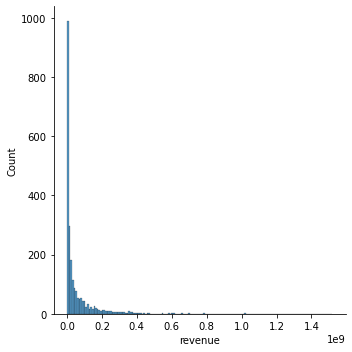

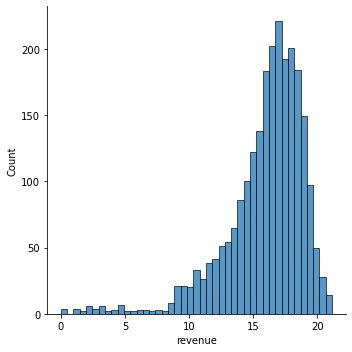

In [372]:
sns.displot(y_train.revenue)
sns.displot(np.log(y_train.revenue))

In [373]:
for i, e in enumerate(y_train['revenue']):
    if(e < 1000):
        print(i, e)

55 3
179 1
211 18
416 70
437 25
523 20
536 923
660 1
732 306
738 4
806 46
854 6
881 88
981 198
987 1
1006 671
1027 3
1188 30
1233 18
1257 30
1301 85
1313 204
1344 10
1381 12
1401 8
1410 15
1427 60
1506 25
1511 8
1533 1
1543 500
1583 3
1599 404
1656 10
1740 126
1803 641
1865 79
1871 100
1925 97
1970 11
1980 311
2047 5
2097 8
2114 23
2131 100
2216 125
2231 422
2381 32


In [374]:
x_train['logRevenue'] = y_train['revenue'].apply(lambda x: np.log(x))
dataset['logRevenue'] = dataset['revenue'].apply(lambda x: np.log(x))

<font size="5">Belongs to Collection</font>

In [375]:
for i, e in enumerate(x_train['belongs_to_collection'][:5]):
    print(i, e)

0 []
1 []
2 []
3 []
4 []


484


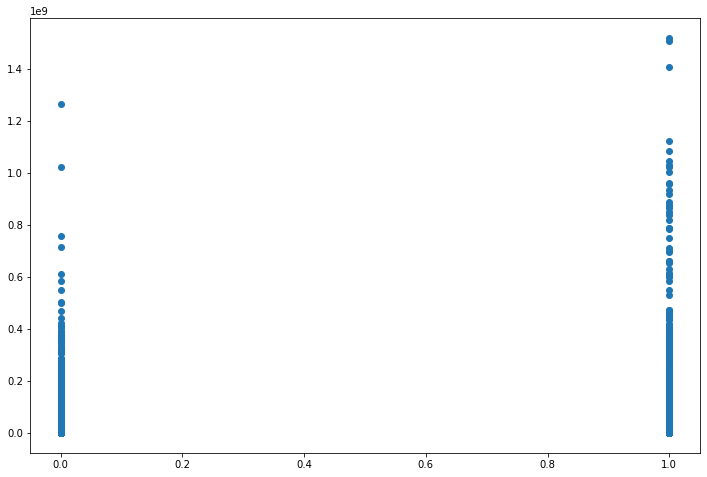

In [376]:
x_train['has_collection'] = x_train['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
print(sum(x_train['has_collection']))

plt.figure(figsize=(12,8))
plt.scatter(x_train['has_collection'], y_train['revenue'])
plt.show()

In [377]:
dataset['has_collection'] = dataset['belongs_to_collection'].apply(lambda x: 0 if (len(x) == 0) else 1)
dataset = dataset.drop(['belongs_to_collection'], axis=1)

<font size="5">Budget</font>

In [378]:
for i, e in enumerate(x_train['budget']):
    if e <=1e5:
        print(i, e)

3 0
12 0
18 0
20 0
32 0
38 0
51 24554
52 0
55 0
59 0
61 0
71 0
74 0
76 0
80 0
83 0
85 0
86 0
87 0
88 0
89 0
90 0
94 0
95 0
100 0
102 0
109 0
110 0
113 0
115 0
117 0
120 0
122 0
126 0
127 0
128 0
133 0
138 0
141 0
145 0
150 0
151 0
153 0
154 0
157 0
159 0
160 0
162 0
163 0
164 0
166 0
167 0
169 0
170 0
173 0
178 0
179 12
180 0
184 0
185 0
190 0
192 0
198 0
201 0
202 0
209 0
218 0
219 0
220 0
221 0
229 0
232 0
233 0
234 0
241 0
243 0
254 0
257 0
261 0
265 0
267 0
271 60000
276 0
277 0
283 0
286 0
292 0
297 0
298 0
305 0
308 0
309 0
312 0
317 0
318 0
319 0
322 0
328 0
329 0
331 0
332 0
340 0
343 0
344 0
348 0
353 0
356 0
362 0
369 0
378 0
381 0
382 0
383 0
384 0
386 0
389 0
392 0
398 0
402 0
404 0
408 0
410 0
412 0
414 0
416 0
417 0
419 0
420 0
428 0
429 0
434 0
435 0
437 4
440 0
450 0
456 0
457 0
458 0
465 0
466 0
467 0
468 0
471 0
473 0
475 0
476 0
480 0
481 0
487 0
490 0
493 0
494 0
497 0
498 0
499 0
500 0
502 0
505 0
508 0
509 0
511 0
513 25000
515 0
517 0
523 0
524 0
525 0
533 0
534 

In [379]:
x_train['isBudgetDirty'] = x_train['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =x_train[x_train['budget'] >= 1e5]['budget'].mean()
mean_budget

30854833.02696366

In [380]:
x_train.loc[x_train.budget < 1e5, 'budget'] = mean_budget

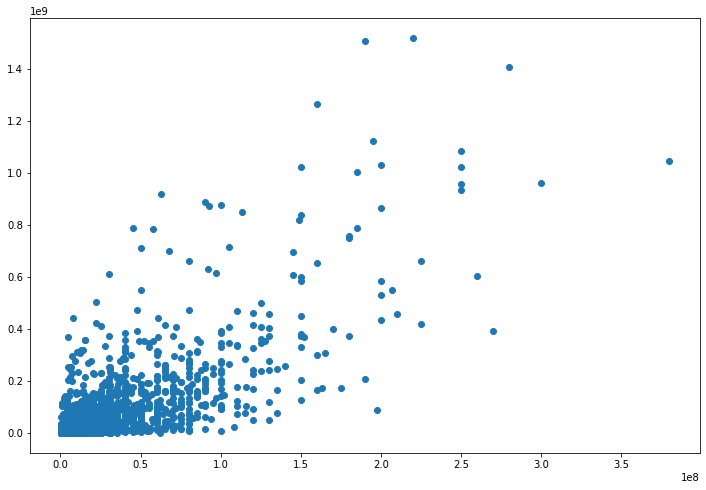

In [381]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['budget'], y_train['revenue'])
plt.show()

In [382]:
dataset['isBudgetDirty'] = dataset['budget'].apply(lambda x : 1 if x < 1e5 else 0)
mean_budget =dataset[dataset['budget'] >= 1e5]['budget'].mean()
mean_budget
dataset.loc[dataset.budget < 1e5, 'budget'] = mean_budget

<font size="5">Genres</font>

In [383]:
for i, e in enumerate(x_train['genres'][:5]):
    for gen in e:
        print(gen['name'])

Comedy
Romance
Horror
Comedy
Music
Fantasy
Thriller
Action
Crime
Drama
Romance
Thriller
Comedy


In [384]:
x_train['list_of_genres'] = x_train['genres'].apply(lambda x: [gen['name'] for gen in x])
x_train['genre_count'] = x_train['list_of_genres'].apply(lambda x: len(x))
x_train = x_train.drop(['genres'], axis=1)
x_train = x_train.drop(['list_of_genres'], axis=1)
x_train.head()

,belongs_to_collection,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,status,tagline,title,Keywords,cast,crew,logRevenue,has_collection,isBudgetDirty,genre_count
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,NaN,tt0094898,en,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,Released,The Four Funniest Men in America are Eddie Mur...,Coming to America,"[{'id': 3015, 'name': 'fast food restaurant'},...","[{'cast_id': 1, 'character': 'Prince Akeem / C...","[{'credit_id': '52fe450fc3a36847f80ba1d3', 'de...",19.481080,0,0,2
701,[],2.500000e+07,NaN,tt0091419,en,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'name': 'The Geffen Company', 'id': 2956}, {...",...,Released,Don't feed the plants.,Little Shop of Horrors,"[{'id': 2382, 'name': 'flower'}, {'id': 2642, ...","[{'cast_id': 8, 'character': 'Seymour Krelborn...","[{'credit_id': '52fe43b59251416c7501b029', 'de...",17.472600,0,0,3
227,[],5.000000e+07,http://www.driveangry3d.com/,tt1502404,en,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'name': 'Summit Entertainment', 'id': 491}, ...",...,Released,One hell of a ride.,Drive Angry,"[{'id': 4479, 'name': 'bone'}, {'id': 41019, '...","[{'cast_id': 4, 'character': 'Milton', 'credit...","[{'credit_id': '54e07d43c3a368454d0053e5', 'de...",17.180438,0,0,4
1698,[],3.085483e+07,NaN,tt0105391,en,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,...,Released,He needed to trust her with his secret. She ha...,Shining Through,"[{'id': 74, 'name': 'germany'}, {'id': 818, 'n...","[{'cast_id': 2, 'character': 'Ed Leland', 'cre...","[{'credit_id': '58fd30ef925141643c02713f', 'de...",16.889176,0,1,3
1011,[],3.500000e+07,NaN,tt3152624,en,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",...,Released,We All Know One.,Trainwreck,"[{'id': 567, 'name': 'alcohol'}, {'id': 2864, ...","[{'cast_id': 4, 'character': 'Amy Townsend', '...","[{'credit_id': '55aa7f0c92514172ef003b26', 'de...",18.762821,0,0,1


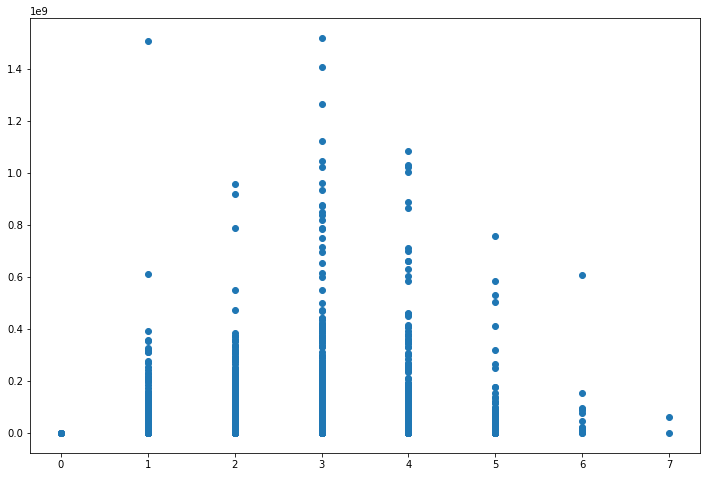

In [385]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['genre_count'], y_train['revenue'])
plt.show()

In [386]:
dataset['list_of_genres'] = dataset['genres'].apply(lambda x: [gen['name'] for gen in x])
dataset['genre_count'] = dataset['list_of_genres'].apply(lambda x: len(x))
dataset = dataset.drop(['genres'], axis=1)
dataset = dataset.drop(['list_of_genres'], axis=1)

<font size="5">Homepage</font>

In [387]:
x_train['hasHomepage'] = x_train['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
x_train = x_train.drop(['homepage'], axis=1)

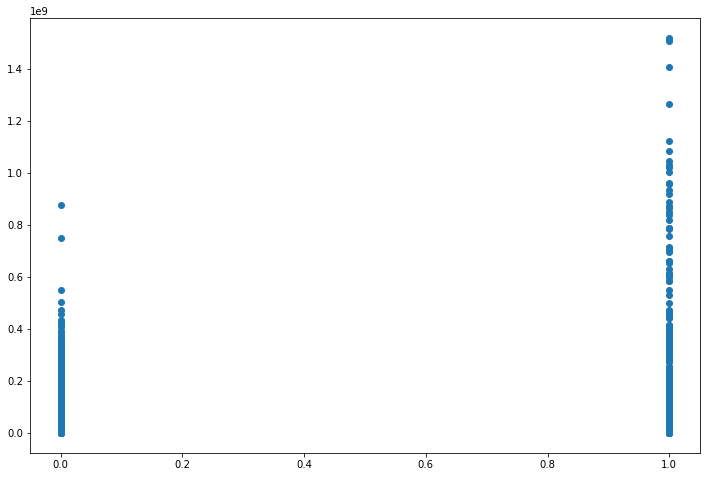

In [388]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasHomepage'], y_train['revenue'])
plt.show()

In [389]:
dataset['hasHomepage'] = dataset['homepage'].apply(lambda x: 0 if pd.isna(x) else 1)
dataset = dataset.drop(['homepage'], axis=1)

<font size="5">IMDB ID</font>

In [390]:
dataset = dataset.drop(['imdb_id'], axis=1)

<font size="5">Original Language</font>

In [391]:
list_of_languages = []
for lan in x_train['original_language']:
    list_of_languages.append(lan)
print(Counter(list_of_languages))
unique_languages = set(list_of_languages)
len(unique_languages)

Counter({'en': 2051, 'fr': 60, 'ru': 43, 'hi': 35, 'es': 33, 'ja': 29, 'it': 19, 'ko': 18, 'de': 17, 'cn': 16, 'zh': 16, 'ta': 15, 'sv': 6, 'nl': 5, 'pt': 5, 'ro': 4, 'da': 4, 'fa': 3, 'no': 2, 'te': 2, 'pl': 2, 'ml': 2, 'fi': 2, 'id': 1, 'hu': 1, 'el': 1, 'ur': 1, 'sr': 1, 'nb': 1, 'ar': 1, 'he': 1, 'bn': 1, 'mr': 1, 'vi': 1})


34

In [392]:
x_train['is_english'] = x_train['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
x_train = x_train.drop(['original_language'], axis=1)

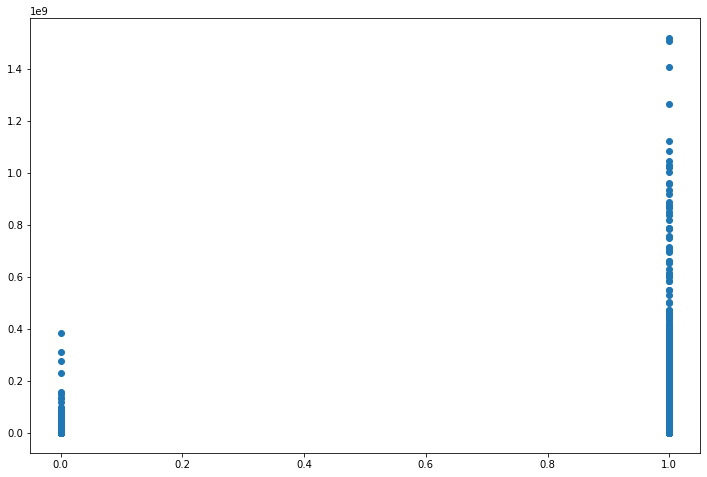

In [393]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['is_english'], y_train['revenue'])
plt.show()

In [394]:
dataset['is_english'] = dataset['original_language'].apply(lambda x: 1 if (x == 'en') else 0)
dataset = dataset.drop(['original_language'], axis=1)

<font size="5">Original title</font>

In [395]:
dataset = dataset.drop(['original_title'], axis=1)

<font size="5">Overview</font>

In [396]:
dataset = dataset.drop(['overview'], axis=1)

<font size="5">Popularity</font>

In [397]:
x_train['logPop'] = x_train['popularity'].apply(lambda x: np.log(x)) #prova

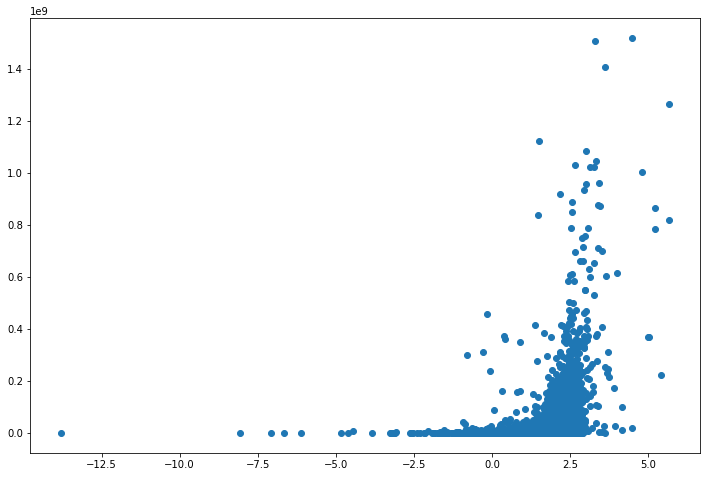

In [398]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['logPop'], y_train['revenue'])
plt.show()

In [399]:
x_train = x_train.drop(['logPop'], axis=1)

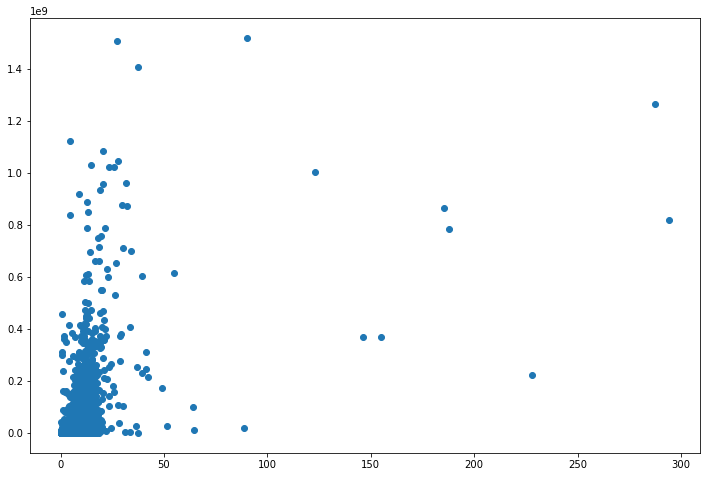

In [400]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['popularity'], y_train['revenue'])
plt.show()

<font size="5">Poster Path</font>

In [401]:
dataset= dataset.drop(['poster_path'], axis=1)

<font size="5">Production Companies</font>

In [402]:
for i, e in enumerate(x_train['production_companies']):
    for comp in e:
        print(comp['name'])

Paramount Pictures
Eddie Murphy Productions
The Geffen Company
Warner Bros.
Summit Entertainment
Saturn Films
Nu Image Films
Millennium Films
Michael De Luca Productions
Twentieth Century Fox Film Corporation
Sandollar Productions
Peter V. Miller Investment Corp.
Universal Pictures
Fuji Television Network
Dentsu
Apatow Productions
Geetha Arts
Bazmark Films
Ingenious Film Partners
Twentieth Century Fox Film Corporation
Dune Entertainment III
ScreenWest
Telefe
A Contracorriente Films
Pampa Films
Directv
Miramax Films
Miramax Films
Lions Gate Films
Ventanarosa Productions
Handprint Entertainment
Wonderland Sound and Vision
CBS Films
Vast Entertainment
Touchstone Pictures
Silver Screen Partners IV
Universal International Pictures (UI)
Paramount Pictures
Alfran Productions
De Laurentiis Entertainment Group (DEG)
Famous Films (II)
International Film Corporation
United Artists
Independent Film Distributors
Romulus Films
Universal Pictures
Hollywood Pictures
DreamWorks SKG
Jinks/Cohen Company


Lionsgate Premiere
Kino Korsakoff
Paramount Pictures
Extreme Productions
ApolloMedia Distribution
Rai Tre Radiotelevisione Italiana
Asymmetrical Productions
Les Films Alain Sarde
Babbo Inc.
The Picture Factory
Canal+
Columbia Pictures
40 Acres & A Mule Filmworks
Centropolis Entertainment
Legendary Pictures
Warner Bros.
Moonlighting Films
The Department of Trade and Industry of South Africa
Fox 2000 Pictures
Walt Disney Pictures
Walt Disney Pictures
Walt Disney Feature Animation
Lionsgate
Allison Shearmur Productions
Keep Your Head
Whitewater Films
Madras Talkies
Rai Cinemafiction
Titti Film
Tele+
Ministero per i Beni e le Attività Culturali (MiBAC)
Columbia Pictures Corporation
Delphi IV Productions
Warner Bros.
Warner Bros.
Warner Bros.
Wide Frame Pictures
Panorama Studios
Walt Disney Pictures
Ópalo Films
WingNut Films
Universal Pictures
Big Primate Pictures
MFPV Film
Paramount Pictures
MTV Films
Canal+
EuropaCorp
Ciné+
Twentieth Century Fox Film Corporation
Campanile Productions
Newm

In [403]:
x_train['list_of_companies'] = x_train['production_companies'].apply(lambda x: [comp['name'] for comp in x])

In [404]:
list_of_companies = []
for l in x_train['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)

print(len(list_of_companies))
unique_companies = set(list_of_companies)
print(len(unique_companies))
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

6506
3183


In [405]:
top_20_comp

['Warner Bros.',
 'Universal Pictures',
 'Paramount Pictures',
 'Twentieth Century Fox Film Corporation',
 'Columbia Pictures',
 'Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Touchstone Pictures',
 'Columbia Pictures Corporation',
 'Walt Disney Pictures',
 'TriStar Pictures',
 'Canal+',
 'Relativity Media',
 'United Artists',
 'Village Roadshow Pictures',
 'Miramax Films',
 'Regency Enterprises',
 'Dune Entertainment',
 'Fox Searchlight Pictures',
 'Lionsgate']

In [406]:
x_train['companies_count'] = x_train['list_of_companies'].apply(lambda x: len(x))

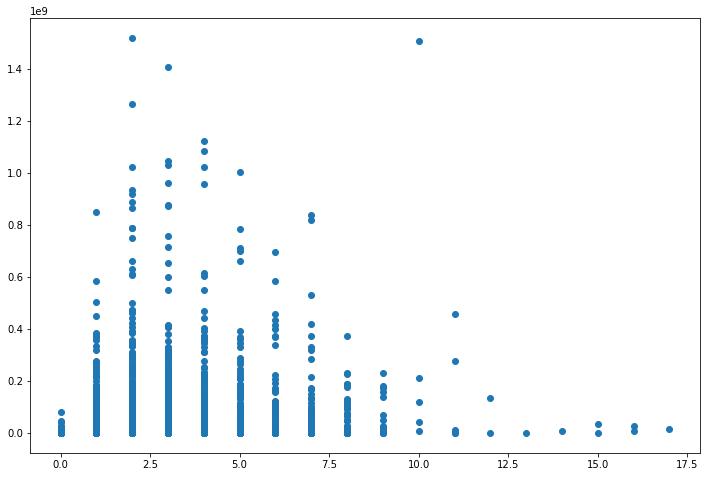

In [407]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['companies_count'], y_train['revenue'])
plt.show()

In [408]:
checked_companies = []
for i, l in enumerate(x_train['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            x_train[colName] = pd.Series([1 if comp in x else 0 for x in x_train['list_of_companies']], index =x_train.index)


In [409]:
print(sum(x_train['isColumbia Pictures Corporation']))
top_20_comp_pair

47


[('Warner Bros.', 164),
 ('Universal Pictures', 149),
 ('Paramount Pictures', 126),
 ('Twentieth Century Fox Film Corporation', 96),
 ('Columbia Pictures', 80),
 ('Metro-Goldwyn-Mayer (MGM)', 68),
 ('New Line Cinema', 60),
 ('Touchstone Pictures', 51),
 ('Columbia Pictures Corporation', 47),
 ('Walt Disney Pictures', 43),
 ('TriStar Pictures', 43),
 ('Canal+', 38),
 ('Relativity Media', 38),
 ('United Artists', 37),
 ('Village Roadshow Pictures', 33),
 ('Miramax Films', 29),
 ('Regency Enterprises', 28),
 ('Dune Entertainment', 26),
 ('Fox Searchlight Pictures', 25),
 ('Lionsgate', 24)]

In [410]:
x_train = x_train.drop(['production_companies'], axis=1)
x_train = x_train.drop(['list_of_companies'], axis=1)
x_train = x_train.drop(['companies_count'], axis=1)

isWarner Bros.


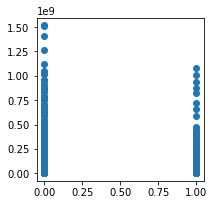

isUniversal Pictures


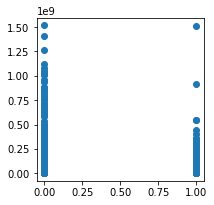

isParamount Pictures


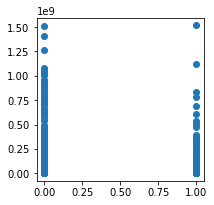

isTwentieth Century Fox Film Corporation


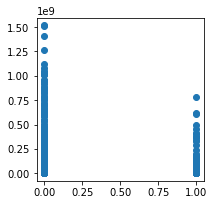

isColumbia Pictures


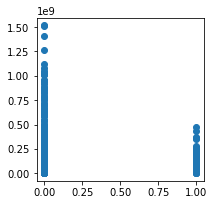

isMetro-Goldwyn-Mayer (MGM)


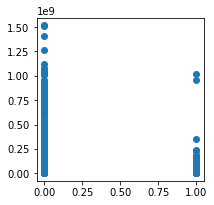

isNew Line Cinema


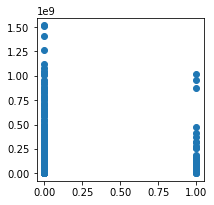

isTouchstone Pictures


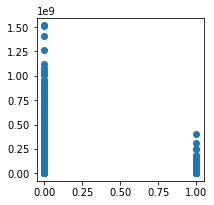

isColumbia Pictures Corporation


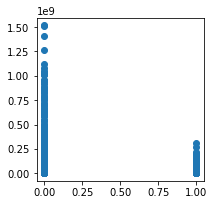

isWalt Disney Pictures


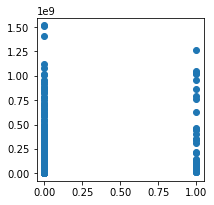

isTriStar Pictures


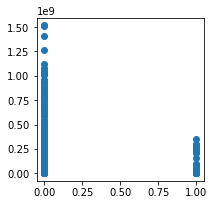

isCanal+


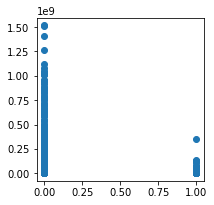

isRelativity Media


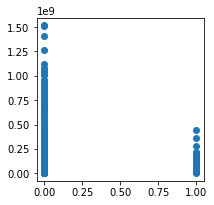

isUnited Artists


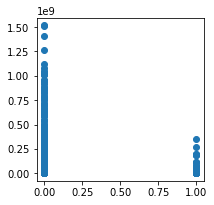

isVillage Roadshow Pictures


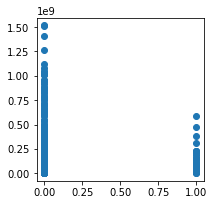

isMiramax Films


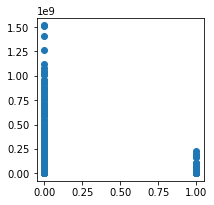

isRegency Enterprises


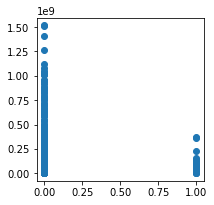

isDune Entertainment


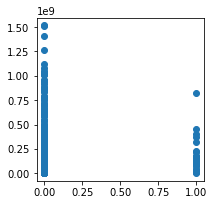

isFox Searchlight Pictures


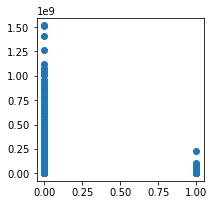

isLionsgate


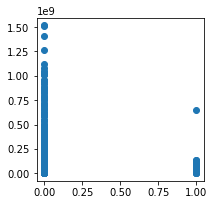

In [411]:
for comp in top_20_comp:
    col = 'is' + comp
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(x_train[col], y_train['revenue'])
    plt.show()

In [412]:
dataset['list_of_companies'] = dataset['production_companies'].apply(lambda x: [comp['name'] for comp in x])
list_of_companies = []
for l in dataset['list_of_companies']:
    for comp in l:
        list_of_companies.append(comp)
unique_companies = set(list_of_companies)
top_20_comp_pair = Counter(list_of_companies).most_common(20)
top_20_comp = []
for p in top_20_comp_pair:
    top_20_comp.append(p[0])

dataset['companies_count'] = dataset['list_of_companies'].apply(lambda x: len(x))
checked_companies = []
for i, l in enumerate(dataset['list_of_companies']):
    for comp in l:
        colName = 'is'+comp
        if(comp in top_20_comp and comp not in checked_companies):
            checked_companies.append(comp)
            dataset[colName] = pd.Series([1 if comp in x else 0 for x in dataset['list_of_companies']], index =dataset.index)
dataset = dataset.drop(['production_companies'], axis=1)
dataset = dataset.drop(['list_of_companies'], axis=1)
dataset = dataset.drop(['companies_count'], axis=1)
dataset.head()

,budget,popularity,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,...,isColumbia Pictures Corporation,isTriStar Pictures,isColumbia Pictures,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films
id,,,,,,,,,,,,,,,,,,,,,
1,1.400000e+07,6.575393,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...",...,0,0,0,0,0,0,0,0,0,0
2,4.000000e+07,8.248895,"[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...",...,0,0,0,0,0,0,0,0,0,0
3,3.300000e+06,64.299990,"[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...",...,0,0,0,0,0,0,0,0,0,0
4,1.200000e+06,3.174936,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...",...,0,0,0,0,0,0,0,0,0,0
5,3.142419e+07,1.148070,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,[],...,0,0,0,0,0,0,0,0,0,0


<font size="5">Production Countries</font>

In [413]:
print(x_train[['production_countries', 'is_english']])
dataset = dataset.drop(['production_countries'], axis=1)

                                   production_countries  is_english
id                                                                 
643   [{'iso_3166_1': 'US', 'name': 'United States o...           1
701   [{'iso_3166_1': 'US', 'name': 'United States o...           1
227   [{'iso_3166_1': 'US', 'name': 'United States o...           1
1698  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1011  [{'iso_3166_1': 'US', 'name': 'United States o...           1
...                                                 ...         ...
1639            [{'iso_3166_1': 'JP', 'name': 'Japan'}]           0
1096  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...           1
1131  [{'iso_3166_1': 'US', 'name': 'United States o...           1
1295  [{'iso_3166_1': 'US', 'name': 'United States o...           1
861   [{'iso_3166_1': 'US', 'name': 'United States o...           1

[2400 rows x 2 columns]


<font size="5">Release Date</font>

In [414]:
date = '01/02/93'
dmy = date.split('/')
integer_map = map(int, dmy)
dmy_int = list(integer_map)
dmy_int

[1, 2, 93]

In [415]:
def fix_date(x):
    """
    Fixes dates which are in 20xx
    """
    year = x.split('/')[2]
    if int(year) <= 21:
        return x[:-2] + '20' + year
    else:
        return x[:-2] + '19' + year

x_train['release_date'] = x_train['release_date'].apply(lambda x: fix_date(x))

In [416]:
x_train['release_date'] = x_train['release_date'].apply(lambda x: x.split('/'))

In [417]:
x_train['release_day'] = pd.Series([x[1] for x in x_train['release_date']], index =x_train.index)
x_train['release_day'] = x_train['release_day'].astype(int)
x_train['release_month'] = pd.Series([x[0] for x in x_train['release_date']], index =x_train.index)
x_train['release_month'] = x_train['release_month'].astype(int)
x_train['release_year'] = pd.Series([x[2] for x in x_train['release_date']], index =x_train.index)
x_train['release_year'] = x_train['release_year'].astype(int)
x_train = x_train.drop(['release_date'], axis=1)

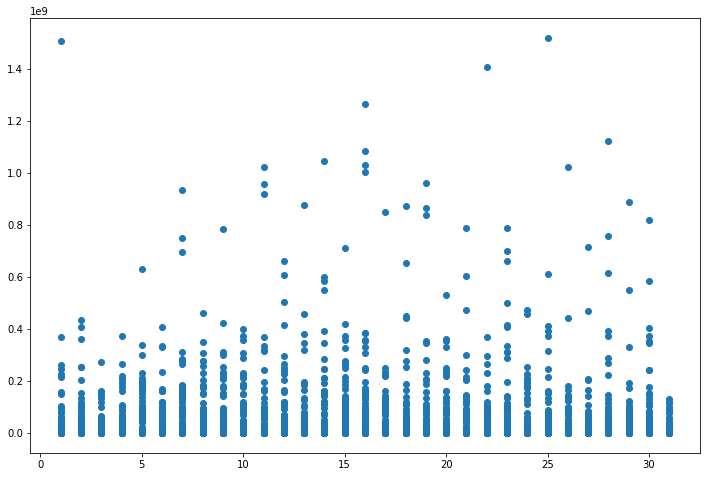

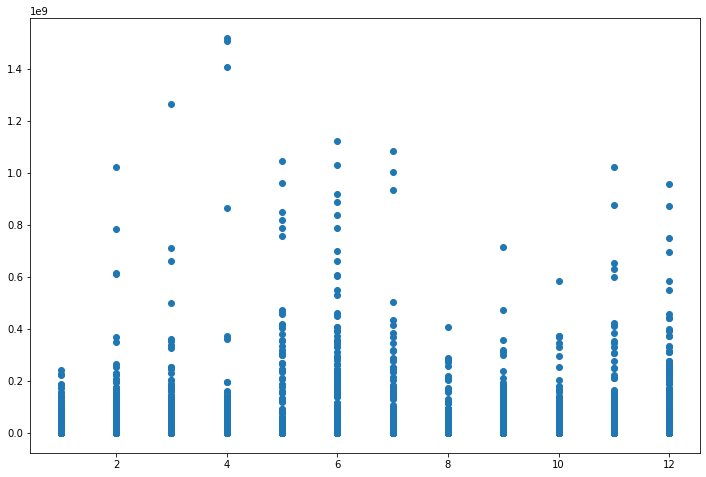

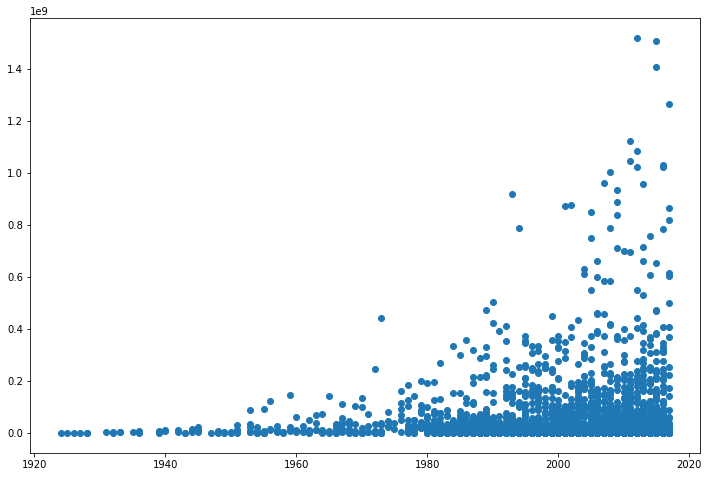

In [418]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_day'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_month'], y_train['revenue'])
plt.show()
plt.figure(figsize=(12,8))
plt.scatter(x_train['release_year'], y_train['revenue'])
plt.show()

In [419]:
dataset['release_date'] = dataset['release_date'].apply(lambda x: fix_date(x))
dataset['release_date'] = dataset['release_date'].apply(lambda x: x.split('/'))
dataset['release_day'] = pd.Series([x[1] for x in dataset['release_date']], index =dataset.index)
dataset['release_day'] = dataset['release_day'].astype(int)
dataset['release_month'] = pd.Series([x[0] for x in dataset['release_date']], index =dataset.index)
dataset['release_month'] = dataset['release_month'].astype(int)
dataset['release_year'] = pd.Series([x[2] for x in dataset['release_date']], index =dataset.index)
dataset['release_year'] = dataset['release_year'].astype(int)
dataset = dataset.drop(['release_date'], axis=1)

<font size="5">Runtime</font>

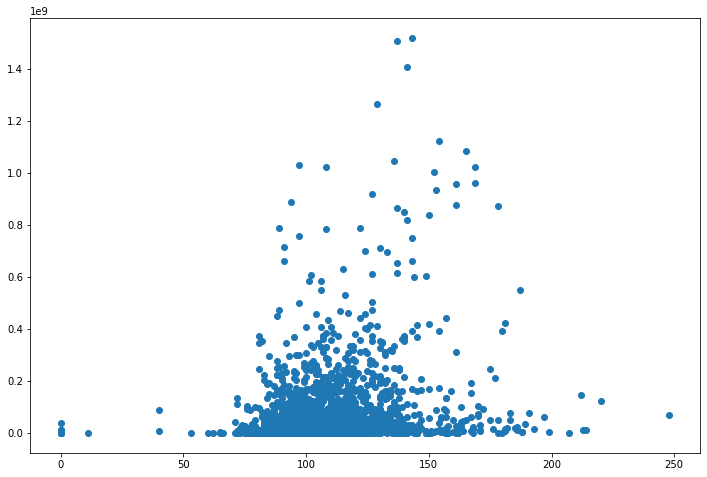

In [420]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['runtime'], y_train['revenue'])
plt.show()

In [421]:
x_train[pd.isna(x_train['runtime'])]

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isWalt Disney Pictures,isLionsgate,isCanal+,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
2303,[],3.085483e+07,tt0116485,Happy Weekend,NaN,0.002229,NaN,"[{'iso_3166_1': 'DE', 'name': 'Germany'}]",NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",...,0,0,0,0,0,0,0,14,3,1996
1336,[],6.000000e+06,tt1107828,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,[],NaN,[],...,0,0,0,0,0,0,0,29,10,2007


In [422]:
x_train.iloc[2302, x_train.columns.get_loc('runtime')] = 90
x_train.iloc[1335, x_train.columns.get_loc('runtime')] = 130

In [423]:
dataset[pd.isna(dataset['runtime'])]

,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,...,isTouchstone Pictures,isRegency Enterprises,isMiramax Films,isVillage Roadshow Pictures,isDune Entertainment,isRelativity Media,isWorking Title Films,release_day,release_month,release_year
id,,,,,,,,,,,,,,,,,,,,,
1336,6.000000e+06,0.292296,NaN,[],Released,NaN,Королёв,[],"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",...,0,0,0,0,0,0,0,29,10,2007
2303,3.142419e+07,0.002229,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",[],...,0,0,0,0,0,0,0,14,3,1996


In [424]:
dataset.iloc[2302, dataset.columns.get_loc('runtime')] = 90
dataset.iloc[1335, dataset.columns.get_loc('runtime')] = 130

<font size="5">Spoken Language</font>

In [425]:
dataset = dataset.drop(['spoken_languages'], axis=1)

<font size="5">Status</font>

In [426]:
for i,e in enumerate(x_train['status']):
    if(e!='Released'):
        print (i,e)

1171 Rumored
1427 Rumored


In [427]:
x_train.iloc[1171] #vabbè

belongs_to_collection                       [{'id': 144200, 'name': 'Swan Princess Series'...
budget                                                                            3.08548e+07
imdb_id                                                                             tt0120254
original_title                                 The Swan Princess: Escape from Castle Mountain
overview                                    The first wedding anniversary of Princess Odet...
popularity                                                                            5.12131
poster_path                                                  /oTEgvTpAIugS7OH6oIoVZkmV3C3.jpg
production_countries                                                                       []
runtime                                                                                    71
spoken_languages                            [{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...
status                                                      

In [428]:
dataset = dataset.drop(['status'], axis=1)

<font size="5">Tagline</font>

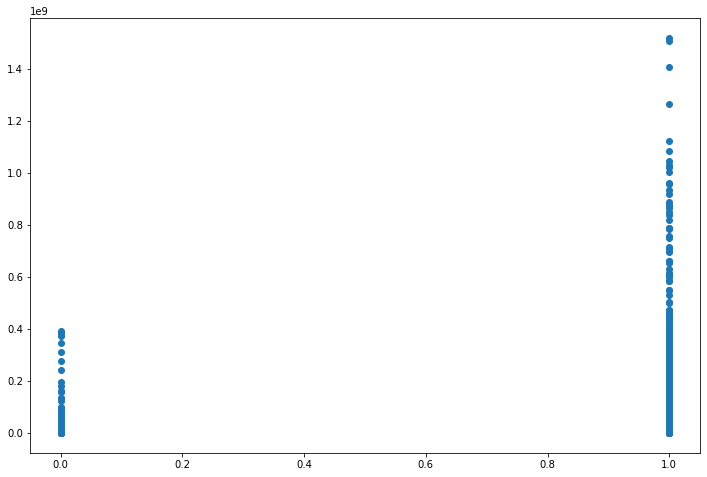

In [429]:
x_train['hasTagline'] = x_train['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
plt.figure(figsize=(12,8))
plt.scatter(x_train['hasTagline'], y_train['revenue'])
plt.show()

In [430]:
dataset['hasTagline'] = dataset['tagline'].apply(lambda x: 0 if pd.isna(x) else 1)
dataset = dataset.drop(['tagline'], axis=1)

<font size="5">Title</font>

In [431]:
dataset = dataset.drop(['title'], axis=1)

<font size="5">Keywords</font>

In [432]:
for i, e in enumerate(x_train['Keywords']):
    print (i)
    for comp in e:
        print(comp['name'])

0
fast food restaurant
prince
heir to the throne
fish out of water
new york city
fake identity
duringcreditsstinger
searching for love
1
flower
solar eclipse
florist
assistant
plant
success
aggression by plant
investigation
nerd
blonde
carnivorous plant
remake
crush
based on play or musical
motorcycle
eclipse
part animated
dentist
bum
killer plant
skid row
based on movie
plant food
flesh eating plant
inept assistant
cult classic
man eating plant
2
bone
car explosion
premarital sex
satanic cult
driver's license
finger gun
backhand slap
car jump
man punching a woman
magic trick
3
germany
based on novel
nazis
double agent
4
alcohol
one-night stand
5
tattoo
short-term memory
6
missionary
world war ii
ranch
australia
british
racist
cattle drive
aftercreditsstinger
stampede
waltzing matilda
trampled to death
7
isolation
cabin
snow
hunt
dark past
8
puberty
first time
9
painter
love of one's life
disabled
woman director
10
high school
teenager
popularity
high school student
teen comedy
duringc

world champion
challenger
street riots
sponsorship
challenge
champion
tax consultant
boxing school
praise
friendship
sport
father figure
493
cheating husband
millionaire
oil tycoon
494
independent film
495
cook
education
widow
bakery
love
tutoring
496
time
airplane
youth
wristwatch
497
498
russia
crime
moscow
499
suicide
diary
friendship
high school
dark comedy
clique
500
obsession
dream
kidnapping
nudity
suspense
unrequited love
doctor
car accident
obsessive love
woman director
captivity
501
spy
cia
undercover
arms dealer
disaster
female spy
aftercreditsstinger
duringcreditsstinger
502
female nudity
father son relationship
child abuse
rape
based on novel
rehabilitation
based on true story
independent film
coming of age
loss of virginity
criminal
incest
childhood
haunted by the past
moral dilemma
brother brother incest
violent youth
boy murderer
503
cabin
plot twist
cabin in the woods
filmed killing
video wall
speaker phone
mounted animal head
young adult
504
blindness and impaired vis

1025
love triangle
obsession
vertigo
goa
hit and run
crime reporter
erotic thriller
1026
underdog
boxer
comeback
biography
rhode island
sport
fighter
come back
1027
1028
1029
prison
street gang
rape
adolescence
sexuality
beethoven
parent child relationship
social worker
living together
society
dystopia
controversy
controversial
violence
futuristic society
1030
gun
birthday
voodoo
toy
stalker
murder
blood
slasher
explosion
killer
doll
evil
toy comes to life
ginger
1031
disc jockey
loss of family
cocaine
comeback
recording studio
british
ibiza
based on true story
disabled
1032
paris
corruption
spain
biography
thriller
espionage
eta
terrorism
based on true events
1990s
1033
london england
hysteria
hospital
doctor
vibrator
masturbation
court trial
horny female
sexually empowered woman
treatment
expert witness
ex prostitute
electrical device
self love
private practice
duringcreditsstinger
woman director
1034
underwear
masseuse
threesome
dildo
sex lesson
1035
sheriff
murder
corpse
video nast

district attorney
imax
super villain
super powers
batman
1525
obsession
hidden camera
stalker
independent film
invasion of privacy
voyeurism
1526
1527
1528
1529
showdown
death star
vision
cult figure
hatred
dream sequence
expectant mother
space opera
chancel
childbirth
galactic war
1530
cambodia
genocide
clay
khmer rouge
claymation
1531
rebel
sword
wilderness
daughter
ninja
soldier
gaijin
1532
loss of lover
mountain
winter
wolf
conversation
death of a friend
aggression by animal
cold
horror
fall from height
suspense
snow
best friend
animal attack
ski lift
frostbite
1533
dance
based on play or musical
silent film
wild party
1534
detective
secret
fbi
homicide
evidence
nerd
vice
intellectual
high school
partner
murder
rich
forensic
1535
dialogue
talking
bridesmaid
wedding reception
wedding
dialogue driven
1536
corruption
detective
police brutality
amish
suspense
barn raising
lancaster, pa
1537
japan
prostitute
hotel
based on novel
hallucination
interview
investigation
murder
junkyard
inte

revenge
dark comedy
smashed head
mad
revenge motive
clown shoes
narcissism
manipulative lover
dream sequence
circus performer
2100
poison
hermes
poseidon
demigod
golden fleece
olympus
3d
kronos
overthrow olympus
based on young adult novel
2101
woman director
2102
santa claus
musical
based on comic
based on play or musical
microphone
little girl
orphan
whistle
child's point of view
chrysler building
rockettes
locket
2103
leprechaun
slasher
2104
2105
post-apocalyptic
dystopia
zombie
zombie apocalypse
interspecies romance
based on young adult novel
2106
paris
london england
assassination
mount rushmore national memorial
riddle
father son relationship
assassin
usa president
wife husband relationship
gold
secret
treasure
family history
buckingham palace
treasure hunt
history
archaeologist
american civil war
archeology 
secret formula
2107
police
cops
cat and mouse
family
revenge drama
2108
independent film
book editor
2109
winter
fantasy
fairy tale
hood
werewolf
aftercreditsstinger
duringcr

In [433]:
x_train['list_of_keywords'] = x_train['Keywords'].apply(lambda x: [comp['name'] for comp in x])

In [434]:
list_of_keywords = []
for l in x_train['list_of_keywords']:
    for key in l:
        list_of_keywords.append(key)

print(len(list_of_keywords))
unique_keywords = set(list_of_keywords)
print(len(unique_keywords))
top_50_keys_pair = Counter(list_of_keywords).most_common(50)
top_50_keys = []
for p in top_50_keys_pair:
    top_50_keys.append(p[0])
Counter(list_of_keywords).most_common(50)

17326
6488


[('woman director', 132),
 ('independent film', 120),
 ('duringcreditsstinger', 105),
 ('murder', 95),
 ('based on novel', 83),
 ('sport', 71),
 ('violence', 68),
 ('revenge', 65),
 ('dystopia', 64),
 ('friendship', 62),
 ('aftercreditsstinger', 57),
 ('sex', 57),
 ('biography', 57),
 ('love', 51),
 ('suspense', 51),
 ('sequel', 49),
 ('police', 49),
 ('drug', 46),
 ('teenager', 43),
 ('nudity', 43),
 ('female nudity', 41),
 ('high school', 40),
 ('prison', 40),
 ('los angeles', 38),
 ('musical', 37),
 ('family', 35),
 ('kidnapping', 34),
 ('father son relationship', 34),
 ('new york', 33),
 ('detective', 32),
 ('3d', 32),
 ('investigation', 31),
 ('based on comic', 31),
 ('london england', 30),
 ('paris', 29),
 ('corruption', 29),
 ('remake', 28),
 ('robbery', 28),
 ('wedding', 28),
 ('world war ii', 27),
 ('based on true story', 27),
 ('wife husband relationship', 27),
 ('suicide', 27),
 ('escape', 27),
 ('prostitute', 27),
 ('gay', 27),
 ('dying and death', 26),
 ('superhero', 26),


In [435]:
x_train['isInTop50Keywords'] = pd.Series([1 if list(set(x) & set(top_50_keys)) != [] else 0 for x in x_train['list_of_keywords']], index =x_train.index)

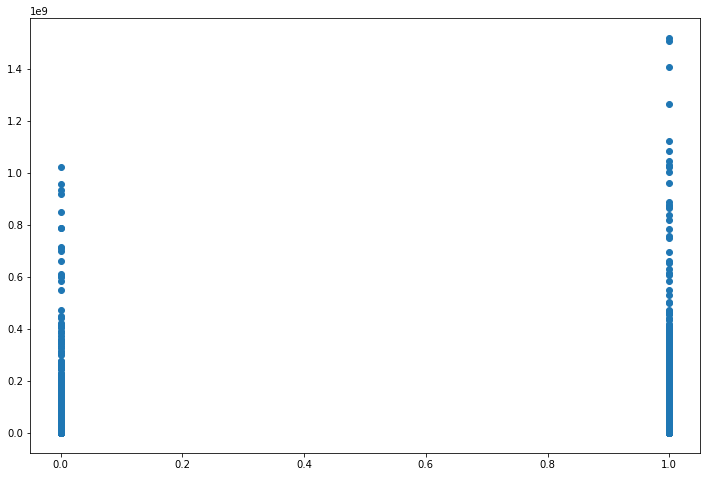

In [436]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['isInTop50Keywords'], y_train['revenue'])
plt.show()

In [437]:
x_train = x_train.drop(['isInTop50Keywords'], axis=1)

In [438]:
x_train['keywordsCount'] = x_train['list_of_keywords'].apply(lambda x: len(x))

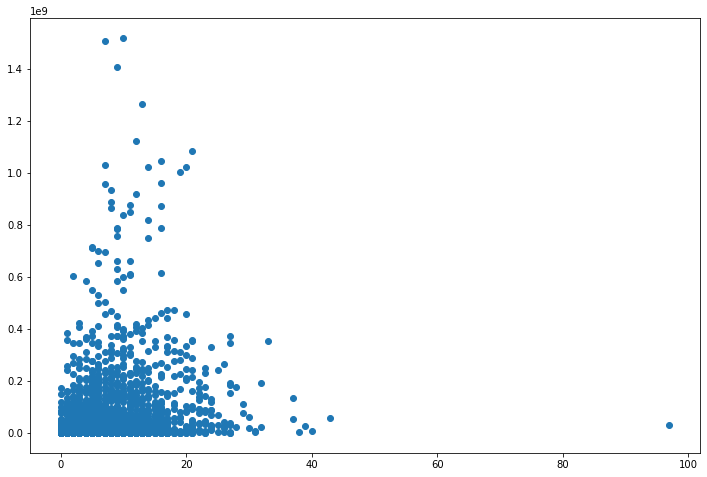

In [439]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['keywordsCount'], y_train['revenue'])
plt.show()

In [440]:
x_train = x_train.drop(['Keywords'], axis=1)
x_train = x_train.drop(['list_of_keywords'], axis=1)

In [441]:
dataset['list_of_keywords'] = dataset['Keywords'].apply(lambda x: [comp['name'] for comp in x])
dataset['keywordsCount'] = dataset['list_of_keywords'].apply(lambda x: len(x))
dataset = dataset.drop(['Keywords'], axis=1)
dataset = dataset.drop(['list_of_keywords'], axis=1)

<font size="5">Cast</font>

In [442]:
for i, e in enumerate(x_train['cast']):
    for act in e:
        print(act['name'], act['gender'])

Eddie Murphy 2
Arsenio Hall 2
James Earl Jones 0
John Amos 2
Shari Headley 1
Frankie Faison 2
Louie Anderson 2
Calvin Lockhart 2
Samuel L. Jackson 2
Eriq La Salle 2
Ralph Bellamy 2
Ralph Bellamy 2
Don Ameche 2
Jim Abrahams 2
Rick Moranis 2
Ellen Greene 1
Vincent Gardenia 2
Steve Martin 2
Tisha Campbell-Martin 1
John Candy 2
Bill Murray 2
Tichina Arnold 1
Miriam Margolyes 1
Jim Belushi 2
Christopher Guest 2
Danny John-Jules 0
Mak Wilson 0
Barbara Rosenblat 0
Kevin Scott 0
Vincent Wong 2
Levi Stubbs 0
Nicolas Cage 2
Amber Heard 1
William Fichtner 2
Billy Burke 2
David Morse 2
Katy Mixon 1
Charlotte Ross 1
Christa Campbell 1
Todd Farmer 2
Jack McGee 2
Tom Atkins 2
Wanetah Walmsley 0
Edrick Browne 2
Robin McGee 0
Fabian C. Moreno 0
Marc Macaulay 2
Pruitt Taylor Vince 2
Julius Washington 0
Jamie Teer 0
Bryan Massey 0
Timothy Walter 0
Kent Jude Bernard 2
Brent Phillip Henry 0
Gerry May 0
Sherri Talley 0
Arianne Margot 0
Con Schell 2
Nick Gomez 2
Joe Chrest 2
Oakley Lehman 0
Thirl Haston 2
Ja

Bruce Salmon 0
Wayne Sutton 0
Joe Sundell 0
Sean Tracey 0
Ben Hodges 0
Daniel Zeh 0
Chris Doubek 0
Andrea Chen 0
Mona Lee Fultz 1
Bill Wise 2
Alina Linklater 0
Charlotte Linklater 0
Genevieve Kinney 0
Elijah Ford 0
Kyle Crusham 0
Conrad Choucroun 0
Maximillian McNamara 0
Taylor Weaver 0
Jessi Mechler 0
Deanna Brochin 0
Stephen Latham 0
Heather Materne 1
Johnny Walter 0
Natalie Makenna 1
Ken Edwards 0
Carl Weathers 0
Craig T. Nelson 2
Vanity 1
Sharon Stone 1
Thomas F. Wilson 2
Robert Davi 2
Bill Duke 2
Jack Thibeau 2
Roger Aaron Brown 2
Stan Foster 2
Mary Ellen Trainor 0
Ed O'Ross 2
Bob Minor 2
David Glen Eisley 0
Dennis Hayden 2
Brian Libby 0
Matt Landers 2
Thomas Wagner 2
Al Leong 2
Robert Duvall 2
Donald Pleasence 2
Don Pedro Colley 2
Maggie McOmie 0
Ian Wolfe 2
Marshall Efron 2
Sid Haig 2
John Pearce 0
Irene Forrest 1
Gary Alan Marsh 0
John Seaton 0
Eugene I. Stillman 0
Jack Walsh 2
Mark Lawhead 0
Richard E. Grant 2
Samantha Mathis 1
Judi Dench 1
Eileen Atkins 1
Cherie Lunghi 1
Imog

Jello Biafra 2
Courtney Love 1
Walter Matthau 2
Mason Gamble 2
Joan Plowright 1
Christopher Lloyd 2
Lea Thompson 1
Robert Stanton 2
Paul Winfield 2
Stephen Rea 2
Jaye Davidson 2
Miranda Richardson 1
Forest Whitaker 2
Adrian Dunbar 2
Jim Broadbent 2
Ralph Brown 2
Tony Slattery 2
Birdy Sweeney 2
Breffni McKenna 0
Joe Savino 0
Josephine White 0
Shar Campbell 0
Bryan Coleman 2
Ray De-Haan 0
David Crionelly 0
Jack Carr 0
Andr√©e Bernard 1
Arnold Schwarzenegger 2
Sam Worthington 2
Mireille Enos 1
Joe Manganiello 2
Harold Perrineau 2
Josh Holloway 2
Terrence Howard 2
Olivia Williams 1
Max Martini 2
Kevin Vance 0
Mark Schlegel 0
Maurice Compte 2
Ned Yousef 2
Martin Donovan 2
Michael Monks 0
Nick Chacon 0
Tim Ware 2
Gary Grubbs 2
B.J. Winfrey 0
Kendrick Cross 0
Hakim Callender 0
Troy Garity 2
Morgan Alexandria 0
Jermaine Holt 0
Jaime FitzSimons 0
Everton Lawrence 2
Neko Parham 0
DeWayne Calhoun 0
Maia Moss-Fife 1
Parisa Johnston 0
Alan Gilmer 0
Emily B. Torres 0
Catherine Dyer 1
Patrick Johnson

Mila Kunis 1
Ray Stevenson 2
Jennifer Beals 1
Tom Waits 0
Michael Gambon 2
Frances de la Tour 1
Lateef Crowder 0
Chris Browning 2
Joe Pingue 2
Evan Jones 2
Lora Martinez-Cunningham 1
Malcolm McDowell 2
Mike McCarty 2
Richard Cetrone 2
Don Thai Theerathada 2
Thom Williams 2
Scott Wilder 0
Heidi Pascoe 1
Jennifer Caputo 1
Eddie Perez 2
Spencer Sano 0
Mike Gunther 0
John Koyama 0
Scott Michael Morgan 2
Sala Baker 2
Arron Shiver 2
Justin Tade 0
Mike Seal 0
Edward A. Duran 0
David Wald 0
Jermaine Washington 0
Clay Donahue Fontenot 0
Al Goto 0
Brad Martin 2
Tim Rigby 0
Luis Bordonada 0
Angelique Midthunder 0
Todd Schneider 0
Darrin Prescott 2
Laurence Chavez 2
Brian Neal Lucero 0
David Midthunder 2
Karin Silvestri 1
Patrick Stewart 2
Jonathan Frakes 2
Brent Spiner 2
LeVar Burton 2
Michael Dorn 2
Gates McFadden 1
Marina Sirtis 1
William Shatner 2
James Doohan 2
Walter Koenig 2
Malcolm McDowell 2
Alan Ruck 2
Whoopi Goldberg 1
Thomas Dekker 2
Cameron Oppenheimer 0
Jenette Goldstein 1
Tim Russ 2

Eddie Rouse 0
Steve Cirbus 2
Lili Taylor 1
Victor Rasuk 2
Liam Broggy 2
Gottfrid Svartholm 0
Fredrik Neij 0
Peter Sunde 0
Kristy Swanson 1
William Ragsdale 2
Meshach Taylor 2
Terry Kiser 2
Stuart Pankin 2
Cynthia Harris 1
Heather Henderson 1
Andrew Hill Newman 2
Julie Foreman 1
John Edmondson 2
Phil Latella 2
Mark Gray 2
Erick Weiss 2
Jackye Roberts 1
John Casino 2
Laurie Wing 1
Julie Warder 1
James Reed 2
Joanne Bradley 1
Allelon Ruggiero 2
Sherry Wall√©n 1
Thom Christopher Warren 2
Wendy Worthington 1
Jim Nital 2
Ilene Norris 1
Hazel Pierce 1
Robert Hines 2
Daphne Lynn Stacey 1
Eva Andell 1
Michael J. Anderson 2
Suzanne DeLaurentiis 1
Dana Dewes 1
Celeste Russi 1
Chris Giannini 2
Coc√≤ 2
Ellen Sabino 1
Christine Vanacore 1
Michael Stermel 2
Jerry Lyden 2
John Richman 2
Rocky Cathcart 2
Joe Milazzo 2
Matt Myers 2
Bud Seese 2
Cliff McMullen 2
Nancy Nicholson 1
Dana Edward Schmidt 1
Ereina Valencia 1
Felise Bagley 1
Irene Schoener 1
Christa Catakoso 1
Bey Brown 1
Jennifer McDonough 1
Lu

Carlo Vogel 0
Harvey Williams 0
Michael Cullen 0
Tim Kelleher 2
Skipp Sudduth 2
Larry Mullane 0
Patrick Ferraro 0
L.B. Williams 0
Jeff Ward 0
Ronda Fowler 0
Hal Sherman 0
Marc Webster 0
James Saxenmeyer 0
Paul DuBois 0
Jordan Brown 0
Michael Marchetta 0
Joanna Gardner 0
Mark Howard 0
Michael Shepherd 0
Gerald King 0
Ronta Davis 0
Lord Kayson 0
Orran Farmer 0
Wayne Muhammed 0
Martin Jaffe 0
Freddie Velez 0
Josh Hutcherson 2
Amanda Seyfried 1
Colin Farrell 2
Jason Sudeikis 2
Aziz Ansari 2
Beyonc√© Knowles 1
Judah Friedlander 2
Steven Tyler 2
Pitbull 2
Blake Anderson 0
Christoph Waltz 2
John DiMaggio 0
Allison Bills 0
Todd Cummings 0
Troy Evans 2
Emma Kenney 1
Jason Harris 0
Jim Conroy 2
Jason Fricchione 0
Helen Hong 0
Kelly Keaton 0
Kyle Kinane 2
Anthony Lumia 0
Malikha Mallette 0
Rosa Salazar 1
Richard Burton 2
Elizabeth Taylor 1
Alec Guinness 2
Gloria Foster 1
Georg Stanford Brown 2
James Earl Jones 0
Peter Ustinov 2
Paul Ford 2
Lillian Gish 1
Roscoe Lee Browne 2
Raymond St. Jacques 2


Jessica Camacho 1
Meredith Eaton 1
Robert Hallak 2
Jamie Lee Curtis 1
Dax Shepard 2
Jeremy Fitzgerald 2
Dorian Kingi 2
Ken Marino 2
Kevin Sheridan 2
Duane Daniels 2
Mario Ardila Jr. 2
Justin Long 2
James Franco 2
Filip Watermann 2
Akiko Morison 1
Sam Rockwell 2
Kevin Spacey 2
Dominique McElligott 1
Rosie Shaw 0
Adrienne Shaw 0
Kaya Scodelario 1
Benedict Wong 2
Malcolm Stewart 2
Robin Chalk 2
Matt Berry 0
William Shatner 2
Leonard Nimoy 2
DeForest Kelley 0
James Doohan 2
George Takei 0
Walter Koenig 2
Nichelle Nichols 1
Jane Wyatt 1
Catherine Hicks 1
Mark Lenard 2
Robin Curtis 1
Robert Ellenstein 2
John Schuck 2
Brock Peters 2
Michael Snyder 0
Sergey Garmash 2
–ò–≥–æ—Ä—å –ë–æ—á–∫–∏–Ω 0
Sergey Nikonenko 2
Vasiliy Mishchenko 0
–ï–≤–≥–µ–Ω–∏–π –°—Ç—ã—á–∫–∏–Ω 0
–í–ª–∞–¥–∏–º–∏—Ä –ë–æ–ª—å—à–æ–≤ 0
–ò–≥–æ—Ä—å –•—Ä–∏—Å—Ç–µ–Ω–∫–æ 0
Boris Shcherbakov 2
Jeremy Irons 2
Dev Patel 2
Toby Jones 2
Stephen Fry 2
Jeremy Northam 2
Devika Bhise 1
Kevin McNally 2
Shazad Latif 2
Malcolm Sinclair 2
Elaine Caulf

Stuart Wilson 2
Jack Black 2
Anna Gunn 1
Laura Cayouette 1
Loren Dean 2
Bodhi Elfman 2
Dan Butler 2
Grant Heslov 2
Ivana Miliƒçeviƒá 1
Seth Green 2
Philip Baker Hall 2
Jason Robards 2
Tom Sizemore 2
Brian Markinson 2
Larry King 2
Tom Quinn 2
Brenna McDonough 1
Bobby Boriello 0
Carl Mergenthaler 0
Donna W. Scott 0
Allison Sie 0
Lillo Brancato 2
John Capodice 2
Arthur J. Nascarella 2
Frank Medrano 0
Joseph Patrick Kelly 2
Lennox Brown 2
Nancy Yee 0
Christopher Lawrence 0
Tom Sizemore 2
Harrison Ford 2
Anne Heche 1
David Schwimmer 2
Jacqueline Obradors 1
Temuera Morrison 2
Allison Janney 1
Cliff Curtis 2
Danny Trejo 2
Kerry Rossall 2
Douglas Weston 2
Ben Bode 2
Derek Basco 2
Amy Sedaris 1
Priscilla Taylor 1
Long Nguyen 2
John Koyama 0
Jen Sung 2
Jake Feagai 0
Michael Chapman 2
E. Kalani Flores 0
Ping Wu 2
Greg Gorman 2
Hoyt Richards 2
Odile Corso 1
Cynthia Langbridge 0
Jody Kono 0
Michael Lushing 0
Pua Kaholokula 0
Roy Dinson Jr. 0
Don Nahaku 2
Reri Tava Jobe 0
Natalie Goss 0
Christian Ma

Charlie Chaplin 2
Paulette Goddard 1
Henry Bergman 2
Tiny Sandford 2
Chester Conklin 2
Hank Mann 2
Stanley Blystone 0
Al Ernest Garcia 2
Richard Alexander 2
Cecil Reynolds 0
Mira McKinney 0
Murdock MacQuarrie 2
Wilfred Lucas 2
Edward LeSaint 0
Fred Malatesta 0
Sammy Stein 2
Juana Sutton 0
Ted Oliver 0
Gloria DeHaven 1
Norman Ainsley 0
Bobby Barber 2
Chuck Hamilton 2
Jack Low 0
Harry Wilson 0
Heinie Conklin 0
Bruce Mitchell 2
Lloyd Ingraham 2
Walter James 2
Buddy Messinger 0
Frank Moran 2
James C. Morton 2
Louis Natheaux 0
J.C. Nugent 0
Russ Powell 2
John Rand 2
Pat Harmon 2
Manuela Martelli 0
Rutger Hauer 2
Luigi Ciardo 0
Nicolas Vaporidis 0
Alessandro Giallocosta 0
Pino Calabrese 0
Sara Manni 0
Bob Hoskins 2
Cathy Tyson 1
Michael Caine 2
Robbie Coltrane 2
Clarke Peters 0
Kate Hardie 1
Zo√´ Nathenson 0
Sammi Davis 1
Joe Brown 0
Pauline Melville 1
Hossein Karimbeik 0
David Halliwell 0
Maggie O'Neill 1
Perry Fenwick 2
Gary Cady 0
Richard Strange 2
Kenny Baker 2
Jack Purvis 2
Bill Moore 0

Ajay Devgn 2
Amrita Rao 1
Sushant Singh 2
Akhilendra Mishra 2
Raj Babbar 2
Farida Jalal 1
Mukesh Tiwari 0
Sitaram Panchal 0
Santosh Dhanoa 0
Swaroop Kumar 0
Michael J. Fox 2
James Woods 2
Stephen Lang 2
Annabella Sciorra 1
Yasiin Bey 2
Luis Guzm√°n 2
Delroy Lindo 2
LL Cool J 2
Mary Mara 1
Penny Marshall 1
Christina Ricci 1
Kathy Najimy 1
Bill Cobbs 2
Akshay Kumar 2
Bobby Deol 2
Sonam Kapoor 1
Irrfan Khan 2
Rimi Sen 1
Sunil Shetty 2
Celina Jaitley 1
Mallika Sherawat 1
Vidya Balan 1
Elizabeth Taylor 1
Richard Burton 2
Rex Harrison 0
Roddy McDowall 2
Martin Landau 2
Hume Cronyn 2
Andrew Keir 2
Kenneth Haigh 2
George Cole 2
Pamela Brown 1
Francesca Annis 1
Gr√©goire Aslan 2
John Doucette 2
Michael Hordern 2
John Hoyt 2
Carroll O'Connor 2
Andrew Faulds 0
Michael Gwynn 2
Peter Grant 0
Marne Maitland 2
Richard O'Sullivan 0
Gwen Watford 1
Douglas Wilmer 2
Megumi Ogata 0
Yuko Miyamura 1
Kotono Mitsuishi 1
Maaya Sakamoto 1
Megumi Hayashibara 1
Ethan Hawke 2
Julie Delpy 1
Seamus Davey-Fitzpatrick

John Tordoff 2
Michael Goldie 0
Liam Halligan 0
Marc Zuber 2
Merelina Kendall 0
Imogen Bain 1
Jimmy Gardner 2
Bobby Parr 0
Douglas Blackwell 0
Andy Hockley 0
Christopher Adamson 2
Richard Strange 2
Susannah Corbett 0
Daniel Newman 2
Harvey Keitel 2
Jason Mewes 2
Blake Clark 2
Jon Polito 2
Paul Hipp 2
Michael Rispoli 2
Jocelin Donahue 1
Logan Shea 2
Jack Kehler 2
Debra Mooney 1
John Pinette 2
Stephanie Danielson 0
Michelle Maniscalco 0
Shim Hyung-Rae 2
Matthew J. Cates 0
Laura Linney 1
Tom Wilkinson 2
Campbell Scott 2
Jennifer Carpenter 1
Kenneth Welsh 0
Mary Beth Hurt 1
Colm Feore 2
Henry Czerny 2
Shohreh Aghdashloo 1
Duncan Fraser 2
Mary Black 1
Julian Christopher 2
Terence Kelly 2
Katie Keating 1
Marilyn Norry 0
Taylor Hill 0
John Innes 2
Iris Graham 1
Andrew Wheeler 2
JR Bourne 2
Ir√®ne Jacob 1
Halina Gryglaszewska 1
Philippe Volter 2
Guillaume de Tonqu√©dec 2
Kalina Jƒôdrusik 0
Aleksander Bardini 2
W≈Çadys≈Çaw Kowalski 0
Jerzy Gudejko 0
Janusz Sterninski 0
Sandrine Dumas 1
Louis Du

Jeff Christian 2
Tenzin Gyurme 2
Tenzin Clive Ball 2
John Burke 2
Earlene Bentley 1
Alex Moggridge 2
Jay Buozzi 2
Rory Campbell 2
Poppy Tierney 1
Spencer Wilding 0
Mark Smith 2
Dave Legeno 2
Khan Bonfils 0
Ruben Halse 2
Jordan Shaw 2
Dominic Burgess 2
Nadia Cameron-Blakey 1
Jeff Tanner 0
Omar Mostafa 2
Leon Delroy Williams 2
Fabio Cardascia 2
Dean Alexandrou 0
Joey Ansah 2
Jon Foo 2
Emil Martirossian 2
Mark Strange 2
Lasco Atkins 2
Rick Avery 2
James Embree 2
Gil Kolirin 2
Jane Osborn 0
Dan Poole 0
Tommy Gunn 2
Philip Harvey 0
Russell Wilcox 2
Ray Donn 0
Danielle Harris 1
Kane Hodder 2
Parry Shen 2
Tony Todd 2
Tom Holland 2
R.A. Mihailoff 0
AJ Bowen 2
Alexis Peters 0
Ed Ackerman 2
David Foy 0
Colton Dunn 2
Rick McCallum 0
John Carl Buechler 2
Kathryn Fiore 1
Erika Hamilton 0
Mercedes McNab 1
Joleigh Fioravanti 1
Rileah Vanderbilt 0
Charlayne DeVillier 0
Sarah Agor 0
Lloyd Kaufman 2
Emma Bell 1
Shawn Ashmore 2
Nick Principe 0
Joel Murray 2
Jim Carrey 2
Sean Young 1
Courteney Cox 1
Tone 

Julie White 1
Ram√≥n Rodr√≠guez 2
Isabel Lucas 1
Glenn Morshower 2
Hugo Weaving 2
Marc Evan Jackson 2
Peter Cullen 2
Arnold Chun 0
Katie Lowes 1
Mark Ryan 2
Reno Wilson 2
Jess Harnell 2
Robert Foxworth 2
Andr√© Sogliuzzo 0
Grey Griffin 1
Tony Todd 2
Charlie Adler 2
Frank Welker 2
Tom Kenny 2
Calvin Wimmer 0
John Di Crosta 0
Michael York 2
Kevin Michael Richardson 2
Robin Atkin Downes 2
John Eric Bentley 2
America Olivo 1
Michael Papajohn 2
Andrew Howard 2
Matthew Marsden 2
Deep Roy 2
Mark Wahlberg 2
Zooey Deschanel 1
John Leguizamo 2
Spencer Breslin 2
Betty Buckley 1
Ashlyn Sanchez 1
Robert Bailey Jr. 2
Frank Collison 2
Jeremy Strong 2
Alan Ruck 2
Victoria Clark 1
M. Night Shyamalan 2
Alison Folland 1
Kristen Connolly 1
Cornell Womack 2
Roberto Lombardi 2
Brian Anthony Wilson 0
Kerry O'Malley 0
Traci Law 0
William James Kelly 0
Art Lyle 0
Mara Hobel 1
Anthony Rapp 2
Adam Pascal 2
Rosario Dawson 1
Jesse L. Martin 2
Wilson Jermaine Heredia 2
Idina Menzel 1
Tracie Thoms 1
Taye Diggs 2
Aar

Anson Mount 2
Jessica Cauffiel 1
Michael Bacall 2
Marco Hofschneider 2
Derek Aasland 0
Jacinda Barrett 1
Peter Millard 2
Chas Lawther 2
Chuck Campbell 2
Yani Gellman 2
Jeannette Sousa 1
Rebecca Gayheart 1
Ben Stiller 2
Kristen Wiig 1
Patton Oswalt 2
Shirley MacLaine 1
Adam Scott 2
Kathryn Hahn 1
Sean Penn 2
Terence Bernie Hines 0
Gurdeep Singh 0
Alex Anfanger 2
Gary Wilmes 2
Adrian Martinez 2
Jon Daly 0
Emile Hirsch 2
Christina Ricci 1
Matthew Fox 2
Susan Sarandon 1
Scott Porter 2
John Goodman 2
Ariel Winter 1
Nicholas Elia 2
Hiroyuki Sanada 0
Art LaFleur 2
Richard Roundtree 2
Togo Igawa 2
Nan Yu 0
Cosma Shiva Hagen 0
Roger Allam 2
Nayo Wallace 0
Rain 2
Moritz Bleibtreu 2
Benno F√ºrmann 2
Ralph Herforth 2
Jana Pallaske 1
Megan Gay 1
Yuriri Naka 0
Narges Rashidi 0
Fang Yu 2
Kick Gurry 2
Franco Nero 2
Jos√© B√≥dalo 2
Loredana Nusciak 0
√Ångel √Ålvarez 0
Eduardo Fajardo 0
Gino Pernice 2
Giovanni Ivan Scratuglia 0
Luciano Rossi 0
Lucio De Santis 0
Owen Wilson 2
Jason Schwartzman 2
Adrien B

Udo Kier 2
Oliver Korittke 2
Karl Markovics 0
Melissa George 1
Ed Speleers 2
Eamonn Walker 2
Alec Newman 2
Karel Roden 2
Kate Magowan 1
Garry Sweeney 0
Stephen McCole 2
Holly Boyd 0
Paul Anderson 2
Sean Harris 2
Liam Neeson 2
Ed Harris 2
Joel Kinnaman 2
Boyd Holbrook 2
Bruce McGill 2
G√©nesis Rodr√≠guez 1
Vincent D'Onofrio 2
Lois Smith 1
Common 0
Beau Knapp 0
Patricia Kalember 1
Daniel Stewart Sherman 0
James Martinez 2
Radivoje Bukviƒá 2
Tony Naumovski 0
Holt McCallany 2
Malcolm Goodwin 2
John Cenatiempo 2
Pauly Shore 2
Carla Gugino 1
Lane Smith 2
Tiffani Thiessen 1
Cindy Pickett 0
Mason Adams 2
Patrick Renna 2
Dennis Burkley 2
Dan Gauthier 2
Tony Barry 2
Kelly Johnson 2
Claire Oberman 1
Shirley Gruar 0
Bruno Lawrence 2
James Gandolfini 2
Susan Sarandon 1
Kate Winslet 1
Steve Buscemi 2
Mandy Moore 1
Mary-Louise Parker 1
Christopher Walken 2
Eddie Izzard 2
Aida Turturro 0
Bobby Cannavale 2
John Turturro 2
Geoffrey Rush 2
Kate Winslet 1
Joaquin Phoenix 2
Michael Caine 2
Billie Whitelaw 

Johnny Lever 2
Denzel Washington 2
John Goodman 2
Donald Sutherland 2
Embeth Davidtz 1
James Gandolfini 2
Elias Koteas 2
Gabriel Casseus 2
Michael J. Pagan 2
Robert Joy 2
Frank Medrano 0
Rooney Mara 1
Theo James 2
Vanessa Redgrave 1
Eric Bana 2
Jack Reynor 2
Aidan Turner 2
Susan Lynch 1
Tom Vaughan-Lawlor 2
Charlie Kelly 0
Nika McGuigan 0
Antony Acheampong 0
Omar Sharif Jr. 0
Pauline McLynn 1
Brian Fortune 0
Elva Trill 0
Laurence O'Fuarain 0
John Connors 2
Lesa Thurman 0
Enda Oates 0
Sheila Moylette 0
Shimmy Marcus 0
Ian Meehan 0
Tony Doyle 0
Ryan McAllister 0
Geraldine McAlinden 0
Michelle Ward 0
Ian McKellen 2
Milo Parker 0
Laura Linney 1
Hattie Morahan 1
Patrick Kennedy 0
Hiroyuki Sanada 0
Colin Starkey 0
Zak Shukor 0
Roger Allam 2
Phil Davis 2
Sarah Crowden 0
Frances de la Tour 1
Hermione Corfield 1
Frances Barber 1
John Sessions 2
Michael Culkin 2
Eileen Davies 1
Charles Maddox 0
Takako Akashi 0
David Foxxe 2
Oliver Devoti 0
Mike Burnside 0
Nicholas Rowe 2
Sam Coulson 2
Kit Connor

Armando Riesco 2
Zen Gesner 2
Mark Andrada 2
Charlotte Sullivan 1
Tim McCarver 0
Stephen King 2
Charlie Hunnam 2
Robert Pattinson 2
Sienna Miller 1
Tom Holland 2
Angus Macfadyen 2
Ian McDiarmid 2
Franco Nero 2
Bobby Smalldridge 0
Tom Mulheron 2
Edward Ashley 0
Harry Melling 2
Daniel Huttlestone 2
Johann Myers 2
Michael Ford-FitzGerald 2
Aleksandar Jovanoviƒá 2
Michael Jenn 0
Nicholas Agnew 0
Frank Clem 0
Clive Francis 0
Matthew Sunderland 2
Yelena Solovey 1
Murray Melvin 2
Bethan Coomber 0
David Calder 2
Stacy Shane 0
Richard Croxford 0
Niall Cusack 0
Colin Carnegie 0
Pat Mooney 0
Louise Parker 0
Gustavo Duque 0
Fernando Vigui 0
Nick Sampson 0
Ruair√≠ Heading 0
Terence Stamp 2
Hugo Weaving 2
Guy Pearce 2
Bill Hunter 2
Sarah Chadwick 0
June Marie Bennett 0
Douglas Fairbanks 0
Snitz Edwards 2
Charles Belcher 2
Julanne Johnston 1
S√¥jin 0
Anna May Wong 0
Brandon Hurst 0
Tote Du Crow 0
Noble Johnson 2
Sam Baker 2
Winter Blossom 0
Etta Lee 0
Mathilde Comont 1
Charles Stevens 0
Eugene Jackso

Michael Adams 0
Dave Bartholomew 0
Fred Lerner 2
Mike Shanks 0
Ray Colbert 0
Holly Cross Vagley 1
Catherine Deneuve 1
Mena Suvari 1
Stephen Rea 2
Tim Roth 2
Justin Chambers 2
Bill Treacher 2
Daniel Mesguich 2
David Schofield 0
Nick Moran 2
Steve Speirs 2
Jan-Gregor Kremp 2
Jeremy Clyde 2
Michael Byrne 2
Jean-Pierre Castaldi 0
Tsilla Chelton 1
Dennis Quaid 2
Daniel Stern 2
Jackie Earle Haley 2
Dennis Christopher 2
Barbara Barrie 1
Paul Dooley 2
Robyn Douglass 1
Hart Bochner 2
Amy Wright 1
Peter Maloney 2
John Ashton 2
Lisa Shure 0
Jennifer K. Mickel 0
P.J. Soles 1
Mel Gibson 2
Danny Glover 2
Gary Busey 2
Mitchell Ryan 2
Tom Atkins 2
Darlene Love 1
Traci Wolfe 1
Jackie Swanson 1
Damon Hines 2
Ebonie Smith 1
Gilles Kohler 2
Lycia Naff 0
Jack Thibeau 2
Ed O'Ross 2
Don Gordon 2
Patrick Cameron 0
Mary Ellen Trainor 0
Steve Kahan 2
Al Leong 2
Michel Bouquet 2
Christa Th√©ret 1
Vincent Rottiers 2
Thomas Doret 2
Romane Bohringer 1
Carlo Brandt 2
Sol√®ne Rigot 1
Anne-Lise Heimburger 0
H√©l√®ne B

Dermot Mulroney 2
June Squibb 1
Howard Hesseman 2
Connie Ray 1
Harry Groener 2
Cheryl Hamada 1
Matt Winston 2
Len Cariou 2
James M. Connor 0
Jill Anderson 1
Mark Venhuizen 0
Nathaniel Brown 2
Paz de la Huerta 1
Cyril Roy 2
Masato Tanno 0
Jesse Kuhn 2
Ed Spear 0
Emily Alyn Lind 1
Olly Alexander 2
Hulk Hogan 2
Tom Lister Jr. 2
Joan Severance 1
Kurt Fuller 2
David Paymer 2
Jesse Ventura 2
Gene Okerlund 0
Howard Finkel 0
John Stanley Hansen II 0
Glen Campbell 2
Eddie Deezen 2
Toby Scott Ganger 0
Kathryn Holcomb 0
Christopher Plummer 2
Phil Harris 0
Stan Ivar 2
Bill Barretta 2
Frank Oz 2
Whoopi Goldberg 1
Kevin Clash 2
Fran Brill 1
Joan Ganz Cooney 0
Arsenio Hall 2
Jim Henson 2
Hugh Jackman 2
Kermit Love 0
Hume Cronyn 2
Jessica Tandy 1
Frank McRae 2
Elizabeth Pe√±a 1
Michael Carmine 2
Dennis Boutsikaris 2
Tom Aldredge 2
Jane Hoffman 1
John DiSanti 2
John Pankow 2
MacIntyre Dixon 2
Michael Greene 2
Doris Belack 1
Wendy Schaal 1
Michelle Williams 1
Eddie Redmayne 2
Kenneth Branagh 2
Julia Orm

Caroline Goodall 1
Lorraine Nicholson 1
Shannon Wilcox 1
Greg Lewis 2
Abigail Breslin 1
Paul Vogt 2
Joseph Leo Bwarie 2
Hope Alexander-Willis 1
Rowan Joseph 2
Jeffrey Scott Jensen 2
Ethan Hawke 2
Emma Watson 1
David Thewlis 2
Lothaire Bluteau 2
Dale Dickey 1
David Dencik 2
Devon Bostick 2
Aaron Ashmore 2
Peter MacNeill 2
Adam Butcher 2
Jacob Neayem 0
Aaron Abrams 2
Catherine Disher 1
Julian Richings 2
Kristian Bruun 2
Wendy Lyon 1
Janet Porter 1
Deborah Grover 1
Vanessa Spencer 1
Noah Segura 2
Attila Sebesy 0
Alli McLaren 1
Mackenzie Kerfoot 1
Stephen Hughes 2
James Preston Rogers 2
Idris Elba 2
Opeyemi Fagbohungbe 2
Abraham Attah 2
Richard Pepple 0
Ama K. Abebrese 0
Kobina Amissah-Sam 2
Emmanuel Affadzi 2
John Arthur 2
Kurt Egyiawan 0
Jude Akuwudike 2
Ricky Adelayitor 2
Ernest Abbeyquaye 2
Nana Mensah 1
Andrew Adote 2
Francis Weddey 2
Fred Nii Amugi 2
Grace Nortey 1
Emmary Brown 2
Nataliah Andoh 1
Terence Stamp 2
Vanessa Redgrave 1
Gemma Arterton 1
Christopher Eccleston 2
Anne Reid 1


Troy Glasgow 2
Nick Bartlett 2
Julia Levy-Boeken 1
Ann Ogbomo 0
Arnold Schwarzenegger 2
Danny DeVito 2
Kelly Preston 1
Chloe Webb 1
David Caruso 2
Bonnie Bartlett 1
Trey Wilson 2
Marshall Bell 2
Hugh O'Brian 2
Nehemiah Persoff 2
Maury Chaykin 2
Tony Jay 2
Tom McCleister 0
Rosemary Dunsmore 1
Richard Portnow 2
Frances Bay 0
Heather Graham 1
Jeff Beck 2
Catherine Reitman 1
Jason Reitman 2
Cary-Hiroyuki Tagawa 2
Wayne Grace 2
Ty Granderson Jones 0
Elizabeth Kaitan 1
Steve Reevis 2
Jay Arlen Jones 2
Sven-Ole Thorsen 2
Dendrie Taylor 1
Robert Harper 2
S.A. Griffin 2
Richard deFaut 0
Peter Dvorsky 2
David Efron 0
Lora Milligan 0
Billy D. Lucas 0
Lew Hopson 0
Marvin J. McIntyre 2
Thomas Wagner 2
Tom Platz 0
Roger Callard 2
Gus Rethwisch 0
Bruce McBroom 2
Linda Porter 0
Joe Medjuck 2
Frank Davis 0
John Michael Bolger 0
Terry Bozzio 0
Tony Hymas 0
Nicolette Larson 0
Jill Avery 0
Dustin Amy 0
Raymond Storti 0
Jodi Benson 1
Christopher Daniel Barnes 2
Jason Marin 2
Samuel E. Wright 2
Buddy Hacket

In [443]:
x_train['list_of_cast'] = x_train['cast'].apply(lambda x: [act['name'] for act in x])
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isTriStar Pictures,isColumbia Pictures Corporation,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,..."
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,..."
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ..."
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso..."
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi..."
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,..."
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki..."


In [444]:
x_train['castCount'] = x_train['list_of_cast'].apply(lambda x: len(x))

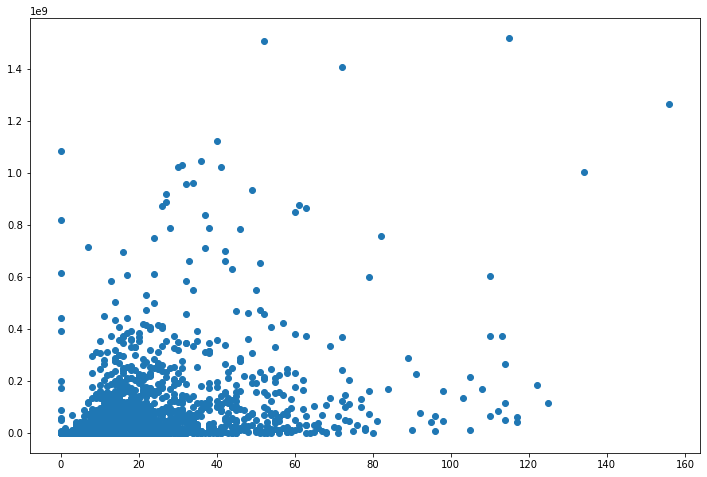

In [445]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['castCount'], y_train['revenue'])
plt.show()

In [446]:
list_of_actors = []
for l in x_train['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

print(len(list_of_actors))
unique_actors = set(list_of_actors)
print(len(unique_actors))
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)

49560
32697


[('Samuel L. Jackson', 25),
 ('Morgan Freeman', 24),
 ('Liam Neeson', 23),
 ('J.K. Simmons', 22),
 ('Robert De Niro', 22),
 ('Bruce Willis', 21),
 ('Bill Murray', 20),
 ('Forest Whitaker', 20),
 ('Willem Dafoe', 20),
 ('Jason Statham', 19),
 ('John Turturro', 19),
 ('Bruce McGill', 19),
 ('Susan Sarandon', 19),
 ('Ed Harris', 19),
 ('Robert Duvall', 18),
 ('Sylvester Stallone', 18),
 ('Denzel Washington', 17),
 ('Philip Seymour Hoffman', 17),
 ('Kevin Bacon', 17),
 ('Steve Buscemi', 17),
 ('Christopher Plummer', 17),
 ('Nicolas Cage', 16),
 ('Allison Janney', 16),
 ('Michael Caine', 16),
 ('Richard Jenkins', 16),
 ('John Goodman', 16),
 ('George Clooney', 16),
 ('Christopher Walken', 16),
 ('Dennis Quaid', 16),
 ('Mark Wahlberg', 15),
 ('Gene Hackman', 15),
 ('James Franco', 15),
 ('Ethan Hawke', 15),
 ('Brian Cox', 15),
 ('Jim Broadbent', 15),
 ('Christian Bale', 15),
 ('Matt Damon', 15),
 ('Colin Farrell', 15),
 ('Alec Baldwin', 15),
 ('Mel Gibson', 15),
 ('Ray Liotta', 15),
 ('Keith

In [447]:
x_train['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in x_train['list_of_cast']], index =x_train.index)
x_train

,belongs_to_collection,budget,imdb_id,original_title,overview,popularity,poster_path,production_countries,runtime,spoken_languages,...,isRegency Enterprises,isRelativity Media,release_day,release_month,release_year,hasTagline,keywordsCount,list_of_cast,castCount,countTop100Actors
id,,,,,,,,,,,,,,,,,,,,,
643,[],3.900000e+07,tt0094898,Coming to America,"Prince Akeem, heir to the throne of Zamunda, l...",7.830087,/7v1Sy0HC5KEM1DMM4Bpy5gVly1K.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",116.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,28,6,1988,1,8,"[Eddie Murphy, Arsenio Hall, James Earl Jones,...",14,2
701,[],2.500000e+07,tt0091419,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...,7.409179,/bxRm8F7rnCsVDyrNh3K9yIFFBKL.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",94.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,19,12,1986,1,27,"[Rick Moranis, Ellen Greene, Vincent Gardenia,...",17,1
227,[],5.000000e+07,tt1502404,Drive Angry,Milton is a hardened felon who has broken out ...,7.668829,/afYwV0EAO8YLRyrTnNaSRysDrCh.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,24,2,2011,1,10,"[Nicolas Cage, Amber Heard, William Fichtner, ...",51,1
1698,[],3.085483e+07,tt0105391,Shining Through,Spirited New Yorker Linda Voss goes to work fo...,5.860319,/e3D4a0B7BbzJfDMuLurDvxZP2oY.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,31,1,1992,1,4,"[Michael Douglas, Melanie Griffith, Liam Neeso...",12,2
1011,[],3.500000e+07,tt3152624,Trainwreck,Having thought that monogamy was never possibl...,17.310647,/2USk7mhiCXRkU9NzttXCzOjg2iV.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,17,7,2015,1,2,"[Amy Schumer, Bill Hader, Brie Larson, Colin Q...",34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,"[{'id': 102019, 'name': 'Death Note Collection...",3.085483e+07,tt0912597,L: change the WorLd,"""The human whose name is written in the Death ...",8.271179,/ndgSMCX4QmfcEX66bS37EiLcUlj.jpg,"[{'iso_3166_1': 'JP', 'name': 'Japan'}]",129.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",...,0,0,31,1,2008,1,1,"[Shunji Fujimura, Mayuko Fukuda, Sei Hiraizumi...",5,0
1096,"[{'id': 645, 'name': 'James Bond Collection', ...",5.800000e+07,tt0113189,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,/5c0ovjT41KnYIHYuF4AWsTe3sKh.jpg,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",...,0,0,16,11,1995,1,15,"[Pierce Brosnan, Sean Bean, Izabella Scorupco,...",20,0
1131,"[{'id': 87220, 'name': 'Smokey and the Bandit ...",3.085483e+07,tt0076729,Smokey and the Bandit,A race car driver tries to transport an illega...,7.683720,/yjhrtTAIxt6HpuckQjXEbmhGTIa.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,0,0,26,5,1977,1,4,"[Burt Reynolds, Sally Field, Jerry Reed, Jacki...",14,0


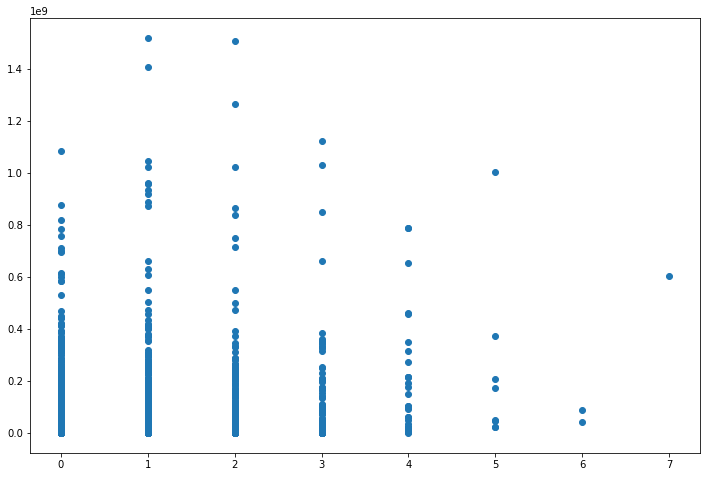

In [448]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['countTop100Actors'], y_train['revenue'])
plt.show()

In [449]:
checked_actors = []
for i, l in enumerate(x_train['list_of_cast']):
    for act in l:
        colName = 'is'+act
        if(act in top_100_actors and act not in checked_actors):
            checked_actors.append(act)
            x_train[colName] = pd.Series([1 if act in x else 0 for x in x_train['list_of_cast']], index =list(range(1,2401)))

isSamuel L. Jackson


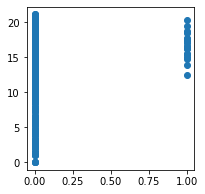

isMorgan Freeman


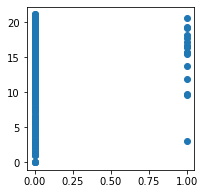

isLiam Neeson


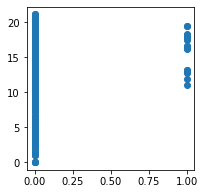

isJ.K. Simmons


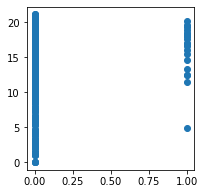

isRobert De Niro


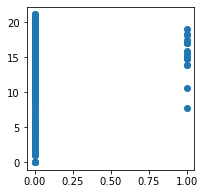

isBruce Willis


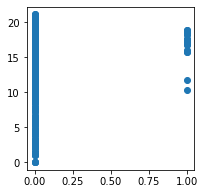

isBill Murray


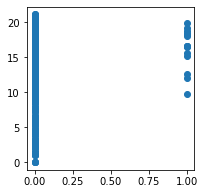

isForest Whitaker


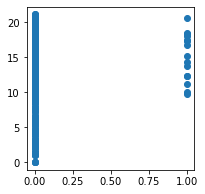

isWillem Dafoe


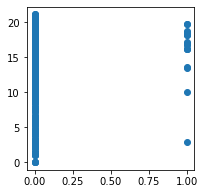

isJason Statham


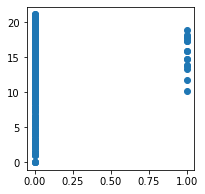

isJohn Turturro


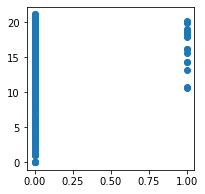

isBruce McGill


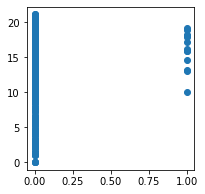

isSusan Sarandon


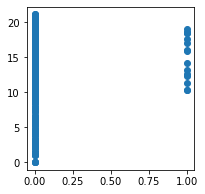

isEd Harris


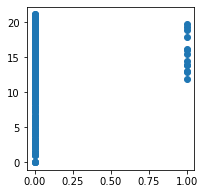

isRobert Duvall


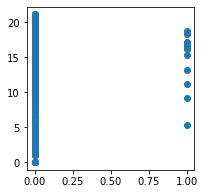

isSylvester Stallone


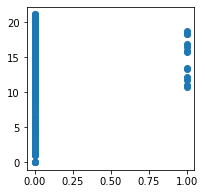

isDenzel Washington


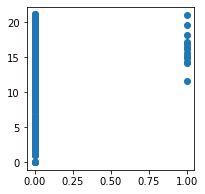

isPhilip Seymour Hoffman


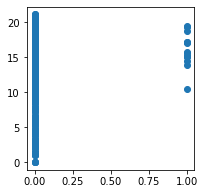

isKevin Bacon


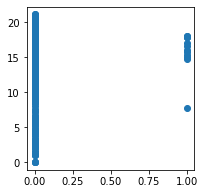

isSteve Buscemi


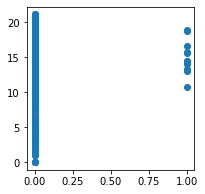

isChristopher Plummer


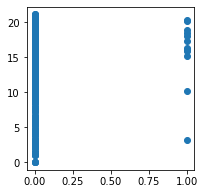

isNicolas Cage


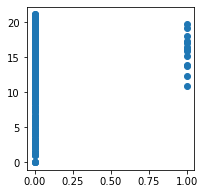

isAllison Janney


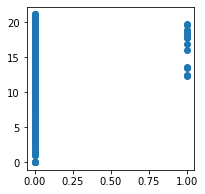

isMichael Caine


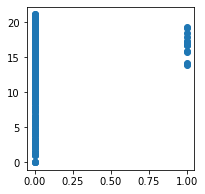

isRichard Jenkins


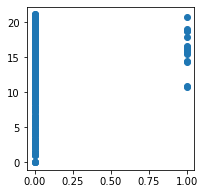

isJohn Goodman


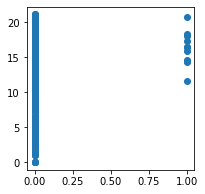

isGeorge Clooney


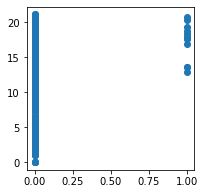

isChristopher Walken


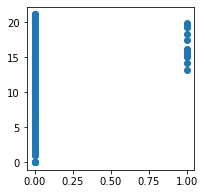

isDennis Quaid


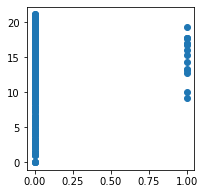

isMark Wahlberg


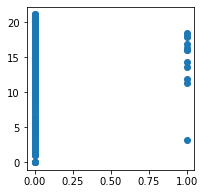

isGene Hackman


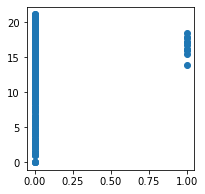

isJames Franco


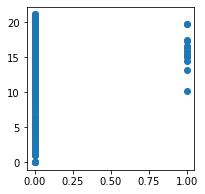

isEthan Hawke


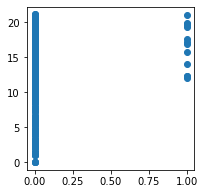

isBrian Cox


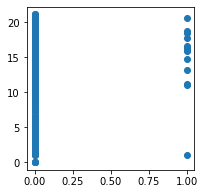

isJim Broadbent


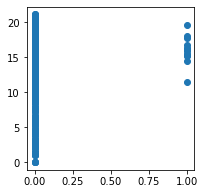

isChristian Bale


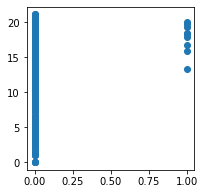

isMatt Damon


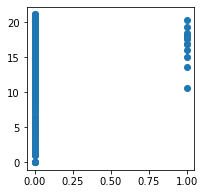

isColin Farrell


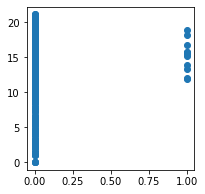

isAlec Baldwin


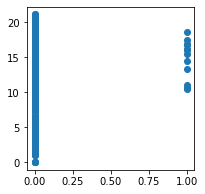

isMel Gibson


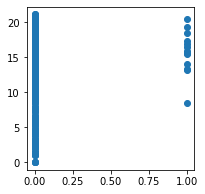

isRay Liotta


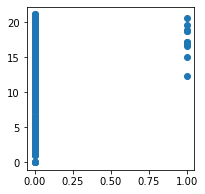

isKeith David


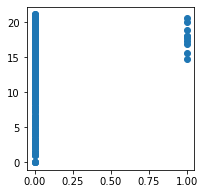

isNicole Kidman


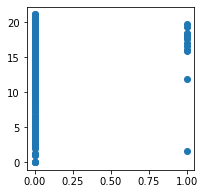

isHugh Jackman


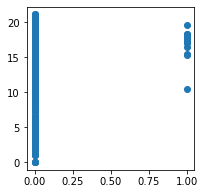

isMichael Shannon


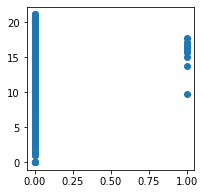

isCharlie Sheen


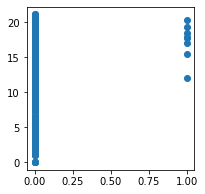

isJohn C. Reilly


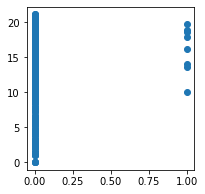

isDonald Sutherland


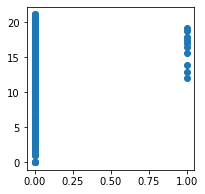

isOwen Wilson


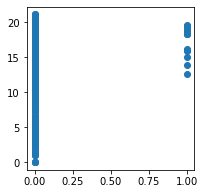

isTom Hanks


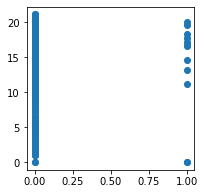

isJason Bateman


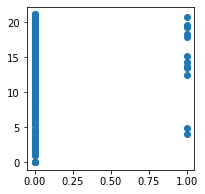

isDennis Hopper


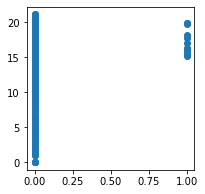

isHarrison Ford


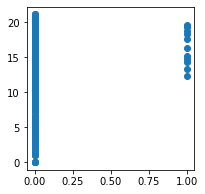

isJulianne Moore


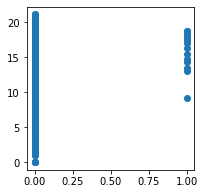

isCate Blanchett


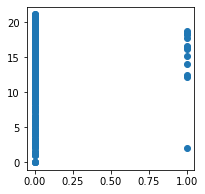

isJohn Cusack


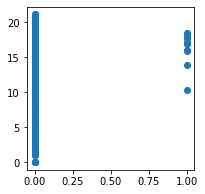

isGary Oldman


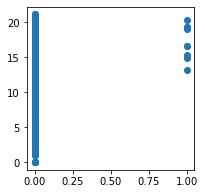

isBen Stiller


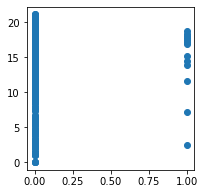

isFrank Welker


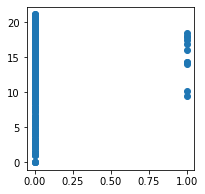

isMarisa Tomei


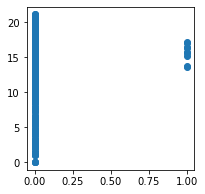

isArnold Schwarzenegger


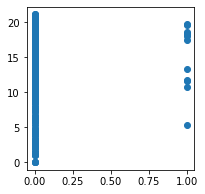

isBruce Greenwood


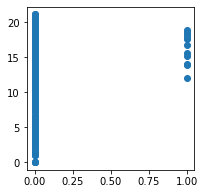

isAaron Eckhart


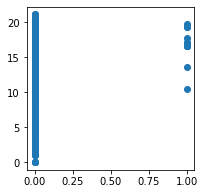

isSigourney Weaver


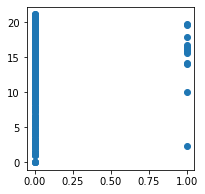

isDavid Koechner


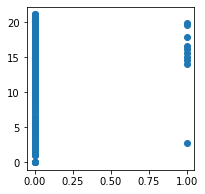

isWhoopi Goldberg


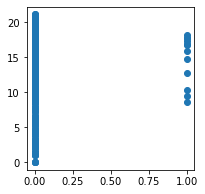

isJohn Leguizamo


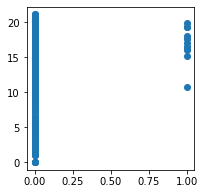

isRussell Crowe


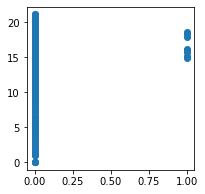

isDanny DeVito


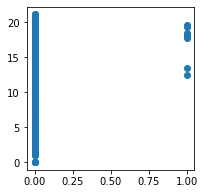

isWilliam H. Macy


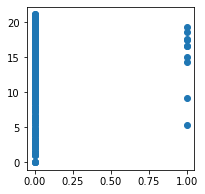

isEwan McGregor


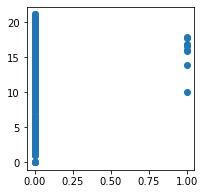

isViola Davis


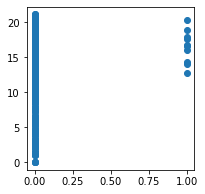

isAnthony Hopkins


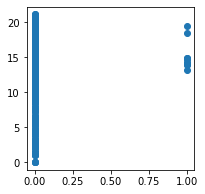

isDan Aykroyd


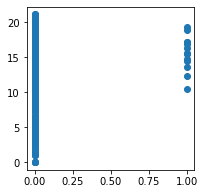

isHarvey Keitel


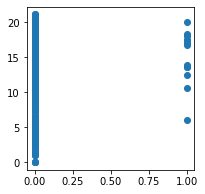

isJames Earl Jones


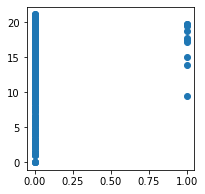

isMichael Douglas


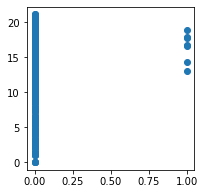

isChanning Tatum


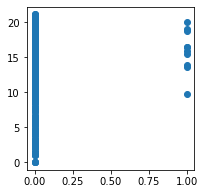

isToni Collette


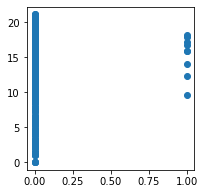

isDean Norris


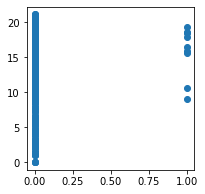

isGiovanni Ribisi


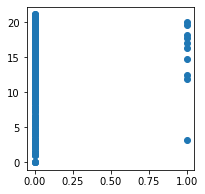

isKurt Russell


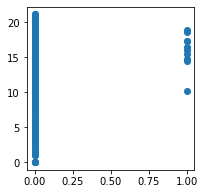

isJohnny Depp


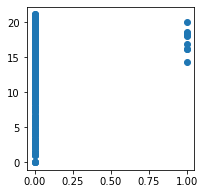

isStanley Tucci


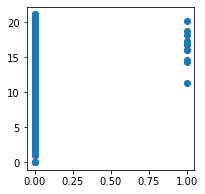

isBrendan Gleeson


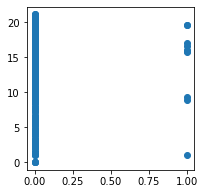

isJames Woods


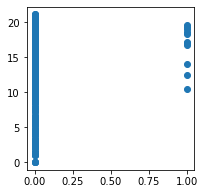

isJohn Hurt


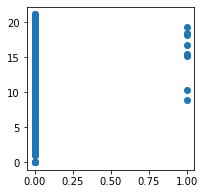

isPhilip Baker Hall


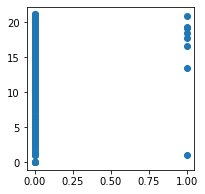

isCheech Marin


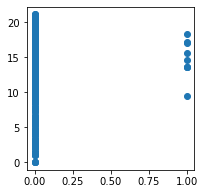

isLaurence Fishburne


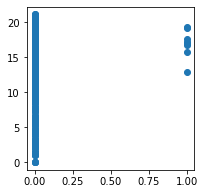

isColleen Camp


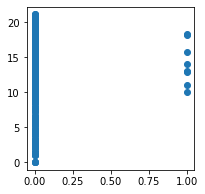

isNick Nolte


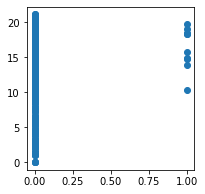

isJames Remar


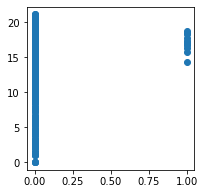

isSean Connery


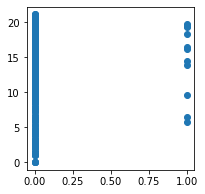

isCharlize Theron


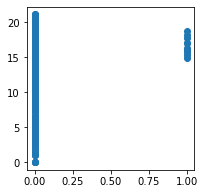

isRobin Williams


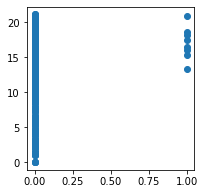

isOlivia Wilde


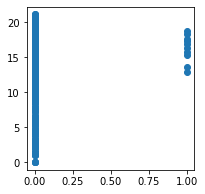

isKeanu Reeves


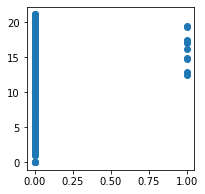

isJamie Bell


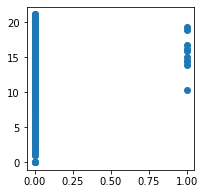

isOliver Platt


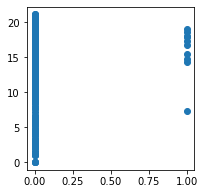

In [450]:
for act in top_100_actors:
    col = 'is' + act
    print(col)
    plt.figure(figsize=(3,3))
    plt.scatter(col, "logRevenue", data=x_train)
    plt.show()

In [451]:
dataset['list_of_cast'] = dataset['cast'].apply(lambda x: [act['name'] for act in x])
dataset['castCount'] = dataset['list_of_cast'].apply(lambda x: len(x))
list_of_actors = []
for l in dataset['list_of_cast']:
    for act in l:
        list_of_actors.append(act)

unique_actors = set(list_of_actors)
top_100_actors_pair = Counter(list_of_actors).most_common(100)
top_100_actors = []
for p in top_100_actors_pair:
    top_100_actors.append(p[0])
Counter(list_of_actors).most_common(100)
dataset['countTop100Actors'] = pd.Series([len(list(set(x) & set(top_100_actors))) for x in dataset['list_of_cast']], index =dataset.index)

In [452]:
dataset = dataset.drop(['cast'], axis=1)
dataset = dataset.drop(['list_of_cast'], axis=1)

<font size="5">Crew</font>

In [453]:
x_train['list_of_crew'] = x_train['crew'].apply(lambda x: [act['name'] for act in x])


In [454]:
x_train['crew_count'] = x_train['list_of_crew'].apply(lambda x: len(x))

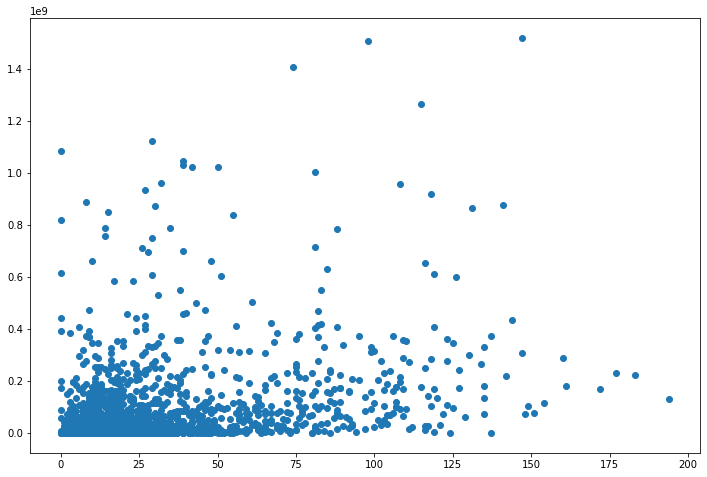

In [455]:
plt.figure(figsize=(12,8))
plt.scatter(x_train['crew_count'], y_train['revenue'])
plt.show()

In [456]:
dataset['list_of_crew'] = dataset['crew'].apply(lambda x: [act['name'] for act in x])
dataset['crew_count'] = dataset['list_of_crew'].apply(lambda x: len(x))
dataset = dataset.drop(['list_of_crew'], axis=1)
dataset = dataset.drop(['crew'], axis=1)

In [457]:
#mettiamo in fondo al dataset revenue e logrevenue per comodità
dataset['Revenue'] = dataset['revenue']
dataset['LogRevenue'] = dataset['logRevenue']
dataset = dataset.drop(['revenue'], axis=1)
dataset = dataset.drop(['logRevenue'], axis=1)

In [458]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 1 to 3000
Data columns (total 38 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   budget                                    3000 non-null   float64
 1   popularity                                3000 non-null   float64
 2   runtime                                   3000 non-null   float64
 3   has_collection                            3000 non-null   int64  
 4   isBudgetDirty                             3000 non-null   int64  
 5   genre_count                               3000 non-null   int64  
 6   hasHomepage                               3000 non-null   int64  
 7   is_english                                3000 non-null   int64  
 8   isParamount Pictures                      3000 non-null   int64  
 9   isUnited Artists                          3000 non-null   int64  
 10  isMetro-Goldwyn-Mayer (MGM)         

Predizioni

Baseline con Regressione lineare

In [459]:
dataset_mat = dataset.astype(float).values
x = dataset_mat[:, :2]
y = dataset_mat[:,36]

In [460]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [461]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  -41196973.74542254
Coefficients [slopes]: [2.59889525e+00 3.16315113e+06]

Train Error : 8411883287163542.000
Test Error : 7282202697059580.000


0.5479176051438146

In [462]:
#solo per grafico

pca = PCA(n_components=1)
x = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
model = LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
model.score(x_test, y_test)

Intercept:  67131902.38890475
Coefficients [slopes]: [2.94098569]

Train Error : 9763078678897512.000
Test Error : 8435797985416258.000


0.47630189457513206

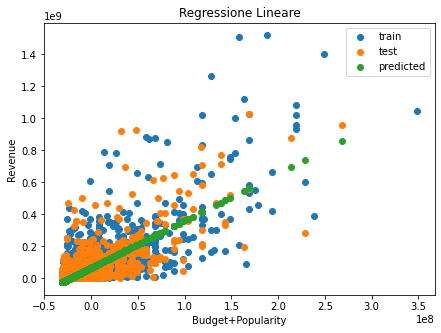

In [463]:
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x_train, y_train, label='train')
ax.scatter(x_test, y_test, label='test')
ax.scatter(x_test, y_pred_test, label='predicted')
ax.set_title("Regressione Lineare")
ax.set_xlabel("Budget+Popularity")
ax.set_ylabel("Revenue")
ax.legend()

Modelli Predittivi

KNN

In [464]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]

In [465]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(x_train,y_train)

y_pred = kNN.predict(x_test)

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(train_acc)
print(test_acc)
print (kNN.score(x_test, y_test))

Accuracy
7363298216302014.0
8076815744873963.0
0.4985876723495861


In [466]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
scaler = MinMaxScaler()
scaler.fit(x_train)

kNN = neighbors.KNeighborsRegressor(n_neighbors=10)
kNN.fit(scaler.transform(x_train),y_train)

y_pred = kNN.predict(scaler.transform(x_test))

# compute Accuracy
print ("Accuracy")
train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(scaler.transform(x_train)))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(scaler.transform(x_test)))
print(train_acc)
print(test_acc)
print (kNN.score(scaler.transform(x_test), y_test))

Accuracy
8462515611380728.0
7934631899176477.0
0.5074145089739961


[8112372201952809.0, 15]
[0.547842109454858, 15]
8567068211688591.0


0.49065866516341994

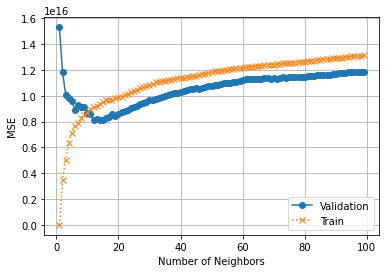

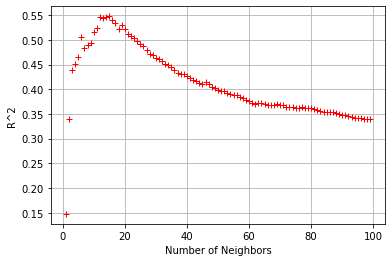

In [467]:
#validation con scaler

x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)
    kNN.fit(scaler.transform(x_train),y_train)

    y_pred = kNN.predict(scaler.transform(x_valid))

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(scaler.transform(x_train)))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=kNN.predict(scaler.transform(x_valid)))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([kNN.score(scaler.transform(x_valid), y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(R_square[:,1], R_square[:,0], "r+", label="R^2")
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Neighbors")
ax.grid()

min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(scaler.transform(x_train_80),y_train_80)
y_pred = kNN.predict(scaler.transform(x_test))
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(scaler.transform(x_test)))
print(test_acc)
kNN.score(scaler.transform(x_test), y_test)

[6783813738975198.0, 12]
[0.6218917434128817, 12]
8053801188696788.0


0.5211741348852041

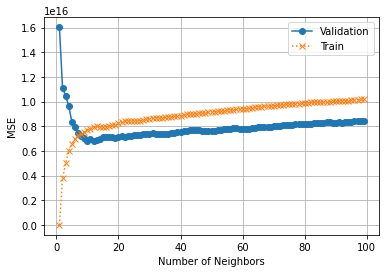

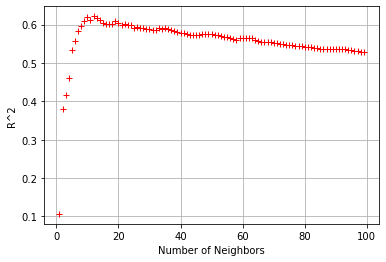

In [468]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)
    kNN.fit(x_train,y_train)

    y_pred = kNN.predict(x_valid)

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=kNN.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=kNN.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([kNN.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

fig, ax = plt.subplots()
ax.plot(R_square[:,1], R_square[:,0], "r+", label="R^2")
ax.set_ylabel("R^2")
ax.set_xlabel("Number of Neighbors")
ax.grid()

min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(x_train_80,y_train_80)
y_pred = kNN.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(test_acc)
kNN.score(x_test, y_test)

[0.5686260698655017, 23]
7289552302512911.0


0.566611329759545

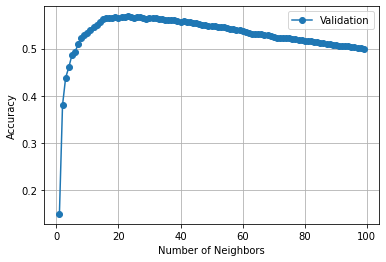

In [469]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(1,100):
    kNN = neighbors.KNeighborsRegressor(n_neighbors=k)

    scores = cross_val_score(kNN, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))

valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Accuracy")
ax.set_xlabel("Number of Neighbors")
ax.grid()
ax.legend()

max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
kNN = neighbors.KNeighborsRegressor(n_neighbors=int(best_k))
kNN.fit(x_train_80,y_train_80)
y_pred = kNN.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=kNN.predict(x_test))
print(test_acc)
kNN.score(x_test, y_test)

Regressione Lineare

In [470]:
x = dataset_mat[:, :36]
y = dataset_mat[:,36]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
scaler = MinMaxScaler()
scaler.fit(x_train)
model = LinearRegression(fit_intercept=True)
model.fit(scaler.transform(x_train), y_train)
y_pred_test = model.predict(scaler.transform(x_test))
y_pred_train = model.predict(scaler.transform(x_train))
print ("Intercept: ", model.intercept_)
print ("Coefficients [slopes]:", model.coef_)
print ()
print ("Train Error : {:.3f}".format( mean_squared_error(y_true = y_train,  
                                          y_pred = y_pred_train)) )
print ("Test Error : {:.3f}".format( mean_squared_error(y_true = y_test,  
                                          y_pred = y_pred_test)) )
print(model.score(scaler.transform(x_test), y_test))

Intercept:  -35997109.64068549
Coefficients [slopes]: [ 9.14100837e+08  5.97986132e+08  5.67449312e+07  5.37257223e+07
 -5.36543648e+07 -1.96678541e+07  2.25740769e+07 -1.01617878e+06
  2.31823372e+07  2.00172325e+06 -1.39088697e+07  6.02219542e+07
 -5.86256834e+06 -1.61869278e+07 -8.93349591e+06  2.83483121e+07
  3.78956141e+06 -6.12535102e+06  6.40776431e+05  1.32409955e+07
 -1.25035764e+07  3.18990647e+06 -1.54039894e+07 -1.82375332e+07
 -2.93814065e+07 -2.37184598e+07 -2.02379347e+07  2.10070339e+07
  8.92802338e+06  3.17829065e+06 -3.35357038e+07 -5.86828873e+06
  6.00272088e+07  7.94154702e+07  8.60048774e+06  1.12271100e+06]

Train Error : 6544202111734662.000
Test Error : 5992790750349114.000
0.6437082132701384


Feature: 0, Score: 914100837.24958
Feature: 1, Score: 597986131.60714
Feature: 2, Score: 56744931.22189
Feature: 3, Score: 53725722.30780
Feature: 4, Score: -53654364.76939
Feature: 5, Score: -19667854.12568
Feature: 6, Score: 22574076.90076
Feature: 7, Score: -1016178.78263
Feature: 8, Score: 23182337.20703
Feature: 9, Score: 2001723.25487
Feature: 10, Score: -13908869.70604
Feature: 11, Score: 60221954.18167
Feature: 12, Score: -5862568.33777
Feature: 13, Score: -16186927.82683
Feature: 14, Score: -8933495.91302
Feature: 15, Score: 28348312.13989
Feature: 16, Score: 3789561.40652
Feature: 17, Score: -6125351.01795
Feature: 18, Score: 640776.43089
Feature: 19, Score: 13240995.50082
Feature: 20, Score: -12503576.40457
Feature: 21, Score: 3189906.46984
Feature: 22, Score: -15403989.41314
Feature: 23, Score: -18237533.15576
Feature: 24, Score: -29381406.51103
Feature: 25, Score: -23718459.77237
Feature: 26, Score: -20237934.72358
Feature: 27, Score: 21007033.94848
Feature: 28, Score: 892

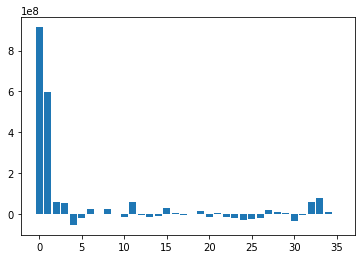

In [471]:
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Albero di Decisione

In [472]:
x = dataset_mat[:, :36]
y = dataset_mat[:,36]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=10)
dt.fit(x_train,y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(train_acc)
print(test_acc)
print(dt.score(x_test, y_test))

6036410932602866.0
9912567606418978.0
0.41066415119436306


[8485398749610783.0, 40]
[0.5270507930917152, 40]
1.0507733012455086e+16


0.37527954413060816

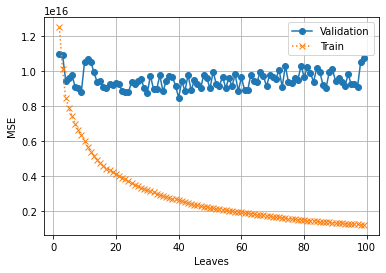

In [473]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(2,100):
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=k)
    dt.fit(x_train,y_train)

    y_pred = dt.predict(x_valid)

# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=dt.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=dt.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([dt.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Leaves")
ax.grid()
ax.legend()


min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train_80,y_train_80)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc)
dt.score(x_test, y_test)

Feature: 0, Score: 0.64945
Feature: 1, Score: 0.11165
Feature: 2, Score: 0.03361
Feature: 3, Score: 0.04477
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01961
Feature: 6, Score: 0.00308
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00502
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.01119
Feature: 29, Score: 0.02102
Feature: 30, Score: 0.01855
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00339
Feature: 33, Score: 0.05500
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.02367


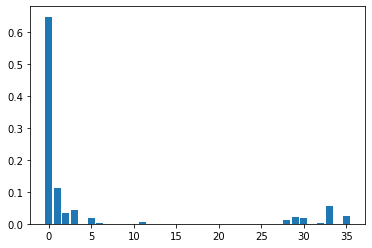

In [474]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [475]:
#approfondire importance
accuraces = []
for min_imp in np.arange(0, 0.5, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,36]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
    dt.fit(x_train,y_train)
    y_pred = dt.predict(x_valid)
    test_acc = mean_squared_error(y_true=y_valid, y_pred=dt.predict(x_valid))
    accuraces.append((dt.score(x_valid, y_valid), sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc, dt.score(x_test, y_test))

1.0528929160841572e+16 0.3740193610381194


[0.5468594085751853, 5]
8009607089528607.0
0.5238016243490453


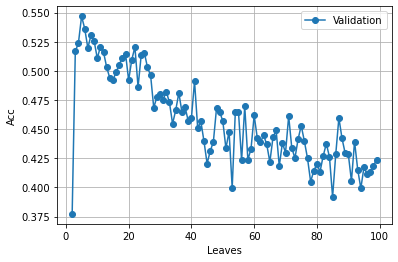

In [476]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(2,100):
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=k)
    scores = cross_val_score(dt, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))
valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Acc")
ax.set_xlabel("Leaves")
ax.grid()
ax.legend()


max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train_80,y_train_80)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc)
print(dt.score(x_test, y_test))

Feature: 0, Score: 0.85346
Feature: 1, Score: 0.07081
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.07574
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000


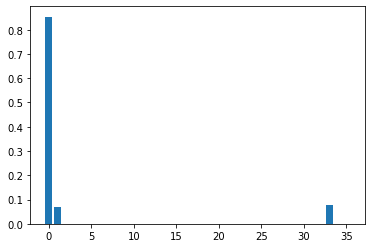

In [477]:
importance = dt.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [478]:
#approfondire importance
accuraces = []
for min_imp in np.arange(0, 0.1, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,36]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
    scores = cross_val_score(dt, x_train_80, y_train_80, 
                             cv=5, 
                             verbose = 0)
    valid_acc_score = scores.mean()
    accuraces.append((valid_acc_score, sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
dt = tree.DecisionTreeRegressor(max_leaf_nodes=int(best_k))
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
test_acc = mean_squared_error(y_true=y_test, y_pred=dt.predict(x_test))
print(test_acc, dt.score(x_test, y_test))

8009607089528607.0 0.5238016243490453


Random Forest

In [479]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
train_acc = mean_squared_error(y_true=y_train, y_pred=rf.predict(x_train))
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
acc = rf.score(x_test,y_test)
print(train_acc)
print(test_acc)
acc

885734224369450.9
5172373800330528.0


0.6924847905214895

(array([ 1.07635359,  1.07635359,  3.22906076,  8.61082871, 16.68348062,
        29.06154688, 19.91254138, 15.60712703,  9.1490055 ,  3.22906076]),
 array([0.63907287, 0.6483635 , 0.65765412, 0.66694475, 0.67623538,
        0.68552601, 0.69481663, 0.70410726, 0.71339789, 0.72268851,
        0.73197914]),
 <BarContainer object of 10 artists>)

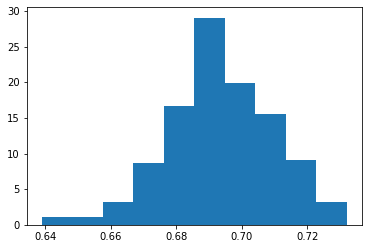

In [480]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=50)
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

[5738482681050662.0, 70]
[0.6801551803344152, 70]
5128925595472884.0


0.6950679340323876

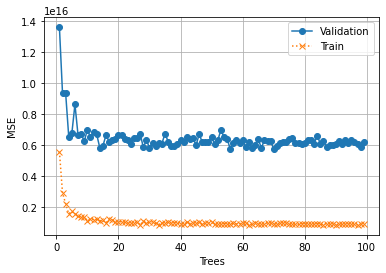

In [481]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
train_mse=[]
valid_mse= []
R_square = []
for k in range(1,100):
    rf = RandomForestRegressor(n_estimators=k)
    rf.fit(x_train,y_train)
# compute Accuracy
    train_acc = mean_squared_error(y_true=y_train, y_pred=rf.predict(x_train))
    valid_acc = mean_squared_error(y_true=y_valid, y_pred=rf.predict(x_valid))
    train_mse.append([train_acc, k])
    valid_mse.append([valid_acc, k])
    R_square.append([rf.score(x_valid, y_valid), k])
print(min(valid_mse))
print(max(R_square))

train_mse = np.array(train_mse)
valid_mse = np.array(valid_mse)
R_square = np.array(R_square)

fig, ax = plt.subplots()
ax.plot(valid_mse[:,1], valid_mse[:,0], "o-", label="Validation")
ax.plot(train_mse[:,1], train_mse[:,0], "x:", label="Train")

ax.set_ylabel("MSE")
ax.set_xlabel("Trees")
ax.grid()
ax.legend()


min_mse = float('inf')
best_k = 0
for mse, k in valid_mse:
    if(min_mse > mse):
        best_k = k
        min_mse = mse
        
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train_80,y_train_80)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc)
rf.score(x_test, y_test)

(array([ 1.09355457,  3.2806637 , 14.21620938, 30.6195279 , 39.36796445,
        54.6777284 , 39.36796445, 25.15175506,  4.37421827,  6.56132741]),
 array([0.68266597, 0.68723821, 0.69181046, 0.6963827 , 0.70095495,
        0.70552719, 0.71009944, 0.71467169, 0.71924393, 0.72381618,
        0.72838842]),
 <BarContainer object of 10 artists>)

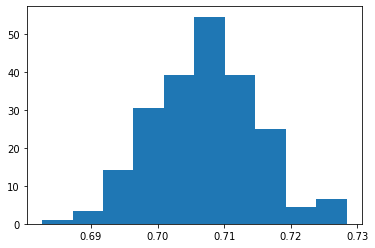

In [482]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

Feature: 0, Score: 0.52317
Feature: 1, Score: 0.16478
Feature: 2, Score: 0.03832
Feature: 3, Score: 0.05112
Feature: 4, Score: 0.00134
Feature: 5, Score: 0.01138
Feature: 6, Score: 0.00336
Feature: 7, Score: 0.00093
Feature: 8, Score: 0.00318
Feature: 9, Score: 0.00070
Feature: 10, Score: 0.00022
Feature: 11, Score: 0.00114
Feature: 12, Score: 0.00348
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00023
Feature: 15, Score: 0.00107
Feature: 16, Score: 0.00230
Feature: 17, Score: 0.00245
Feature: 18, Score: 0.00097
Feature: 19, Score: 0.00136
Feature: 20, Score: 0.00104
Feature: 21, Score: 0.00142
Feature: 22, Score: 0.00064
Feature: 23, Score: 0.00024
Feature: 24, Score: 0.00098
Feature: 25, Score: 0.00033
Feature: 26, Score: 0.00034
Feature: 27, Score: 0.00096
Feature: 28, Score: 0.01663
Feature: 29, Score: 0.02733
Feature: 30, Score: 0.02094
Feature: 31, Score: 0.00050
Feature: 32, Score: 0.02674
Feature: 33, Score: 0.03659
Feature: 34, Score: 0.01125
Feature: 35, Score: 0.04252


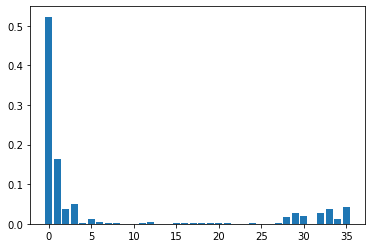

In [483]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [484]:
accuraces = []
for min_imp in np.arange(0, 0.5, 0.01):
    sel_features = []
    for i, x in enumerate(importance):
        if(x >min_imp):
            sel_features.append(i)

    x = dataset_mat[:,sel_features]
    y = dataset_mat[:,36]
    x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
    x_train, x_valid, y_train, y_valid = train_test_split(x_train_80, y_train_80, test_size=0.25, random_state=42)
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    test_acc = mean_squared_error(y_true=y_valid, y_pred=rf.predict(x_valid))
    accuraces.append((rf.score(x_valid, y_valid), sel_features))
    
best_features = max(accuraces)[1]
x = dataset_mat[:,best_features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train, y_train)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc, rf.score(x_test, y_test))
len(best_features)

5019051015166867.0 0.7016003514259274


36

[0.679421936167846, 81]
4754829555007055.0
0.7173092156353491


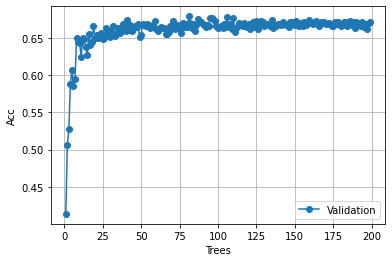

In [485]:
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
train_mse=[]
valid_acc= []
R_square = []
for k in range(1,200):
    rf = RandomForestRegressor(n_estimators=k)
    scores = cross_val_score(rf, x_train_80, y_train_80, 
                         cv=5, 
                         verbose = 0)
    valid_acc_score = scores.mean()
    valid_acc.append([valid_acc_score, k])
print(max(valid_acc))
valid_acc = np.array(valid_acc)

fig, ax = plt.subplots()
ax.plot(valid_acc[:,1], valid_acc[:,0], "o-", label="Validation")

ax.set_ylabel("Acc")
ax.set_xlabel("Trees")
ax.grid()
ax.legend()


max_acc = 0
best_k = 0
for acc, k in valid_acc:
    if(max_acc < acc):
        best_k = k
        max_acc = acc
        
rf = RandomForestRegressor(n_estimators=int(best_k))
rf.fit(x_train_80,y_train_80)
test_acc = mean_squared_error(y_true=y_test, y_pred=rf.predict(x_test))
print(test_acc)
print(rf.score(x_test, y_test))

(array([ 0.59169471,  0.59169471,  1.18338942,  5.91694712, 16.56745193,
        21.30100963, 31.95151444, 25.44287261, 12.42558895,  2.36677885]),
 array([0.6450596 , 0.6535099 , 0.66196021, 0.67041051, 0.67886081,
        0.68731112, 0.69576142, 0.70421172, 0.71266203, 0.72111233,
        0.72956264]),
 <BarContainer object of 10 artists>)

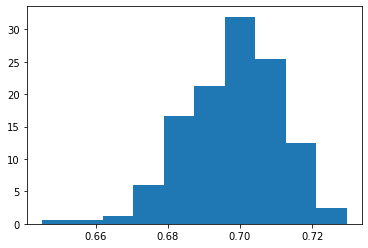

In [486]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    rf.fit(x_train,y_train)
    hist_data.append(rf.score(x_test,y_test))
plt.hist(hist_data, density = True)

Feature: 0, Score: 0.55772
Feature: 1, Score: 0.12214
Feature: 2, Score: 0.05120
Feature: 3, Score: 0.03780
Feature: 4, Score: 0.00222
Feature: 5, Score: 0.01164
Feature: 6, Score: 0.00538
Feature: 7, Score: 0.00092
Feature: 8, Score: 0.00376
Feature: 9, Score: 0.00077
Feature: 10, Score: 0.00041
Feature: 11, Score: 0.00341
Feature: 12, Score: 0.00254
Feature: 13, Score: 0.00002
Feature: 14, Score: 0.00020
Feature: 15, Score: 0.00118
Feature: 16, Score: 0.00263
Feature: 17, Score: 0.00258
Feature: 18, Score: 0.00045
Feature: 19, Score: 0.00126
Feature: 20, Score: 0.00116
Feature: 21, Score: 0.00189
Feature: 22, Score: 0.00074
Feature: 23, Score: 0.00022
Feature: 24, Score: 0.00077
Feature: 25, Score: 0.00052
Feature: 26, Score: 0.00039
Feature: 27, Score: 0.00168
Feature: 28, Score: 0.01864
Feature: 29, Score: 0.03226
Feature: 30, Score: 0.02729
Feature: 31, Score: 0.00074
Feature: 32, Score: 0.02145
Feature: 33, Score: 0.03777
Feature: 34, Score: 0.00939
Feature: 35, Score: 0.03689


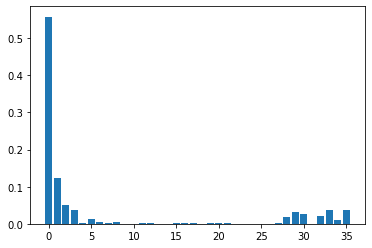

In [487]:
importance = rf.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

33


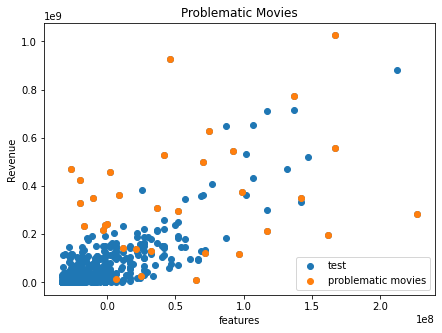

In [488]:
#error exploration
predicted_y = rf.predict(x_test)
sel_errors_pos = []
errors = np.square((predicted_y - y_test)**2)
test_acc = np.mean(errors)
for i, err in enumerate(errors):
    if(err > test_acc):
        sel_errors_pos.append((i))

pca = PCA(n_components=1)
x = pca.fit_transform(x_test)
problematic_movies = x[sel_errors_pos]
print(len(y_test[sel_errors_pos]))
fig, ax = plt.subplots(figsize=(7,5))
ax.scatter(x, y_test, label='test')
ax.scatter(problematic_movies, y_test[sel_errors_pos], label='problematic movies')
ax.set_title("Problematic Movies")
ax.set_xlabel("features")
ax.set_ylabel("Revenue")
ax.legend()



<ipython-input-489-a92a3d9a8e50>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(7,5))


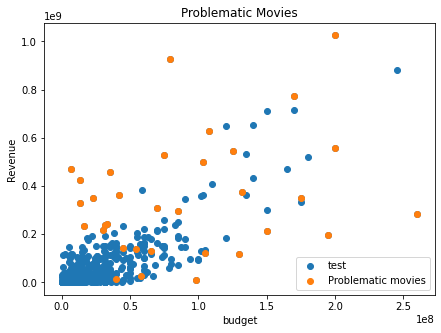

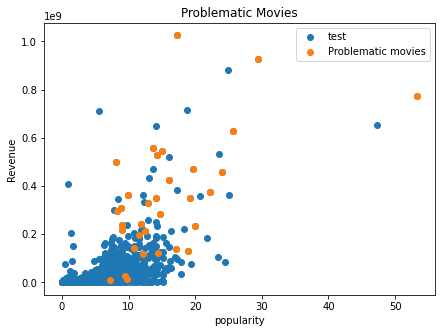

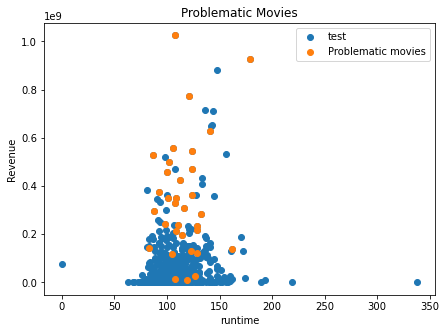

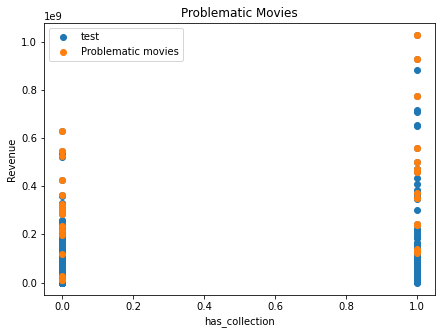

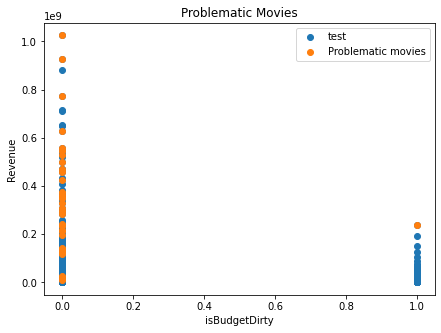

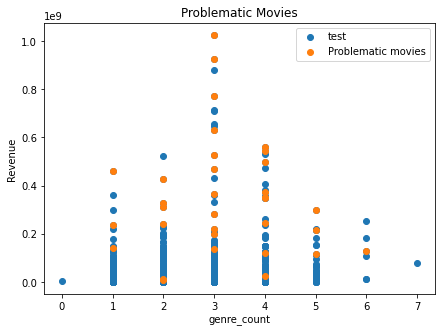

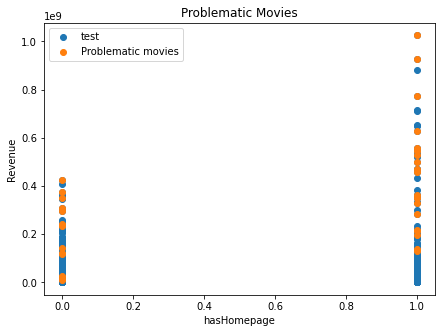

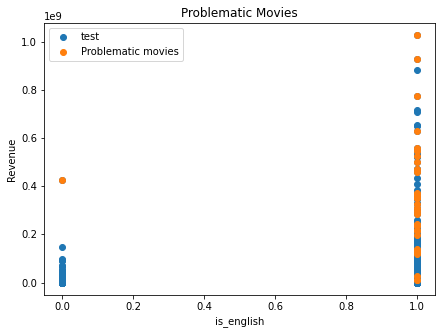

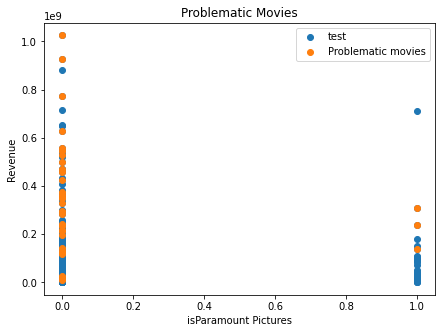

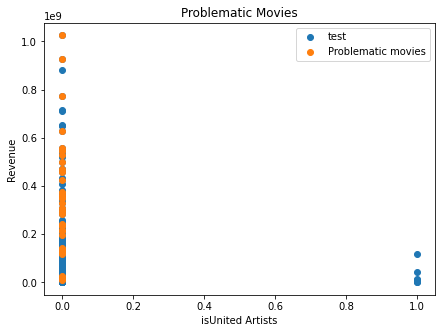

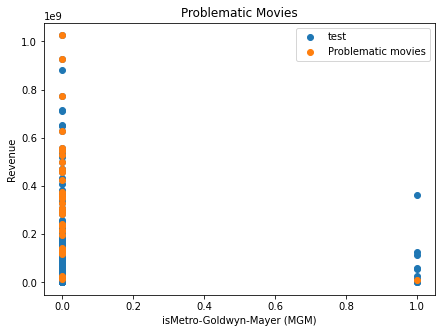

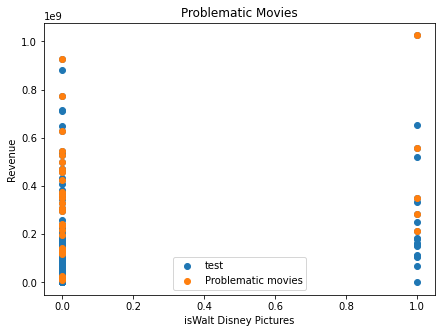

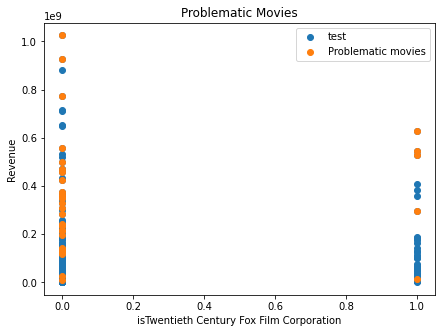

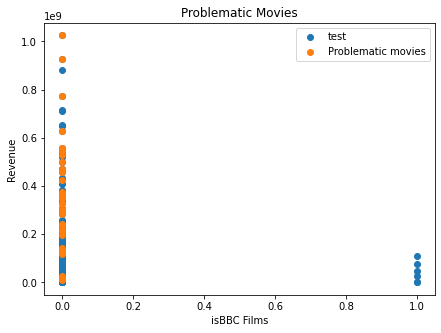

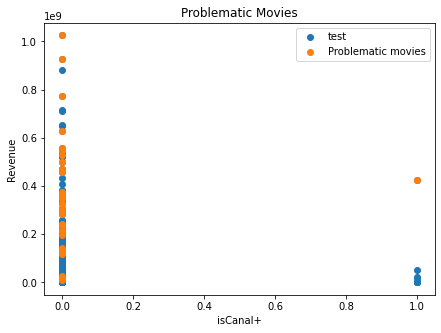

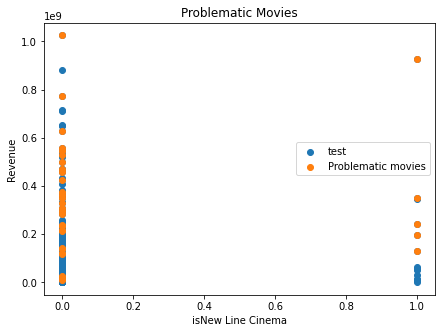

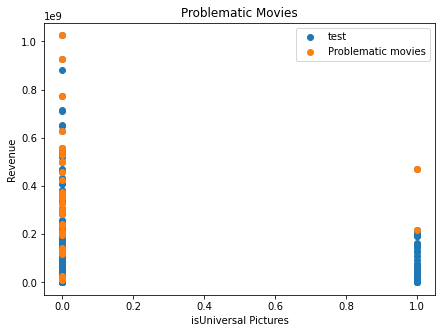

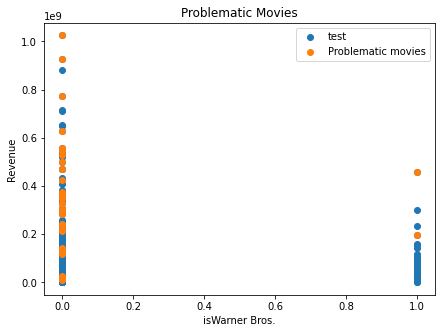

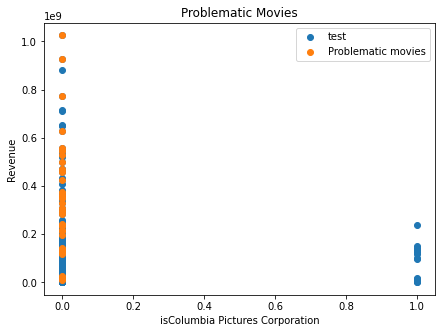

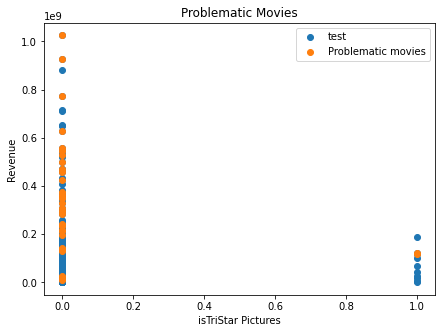

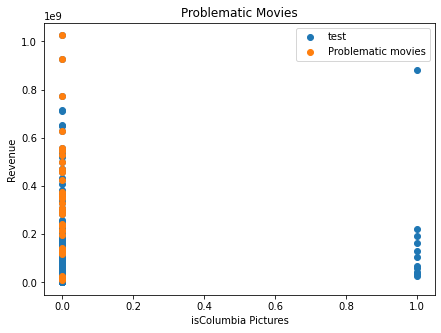

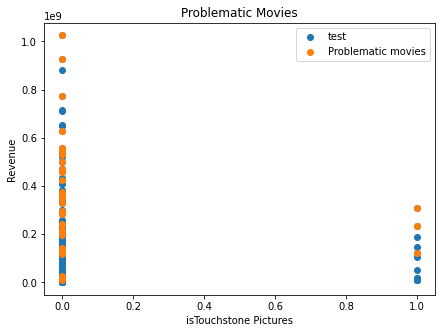

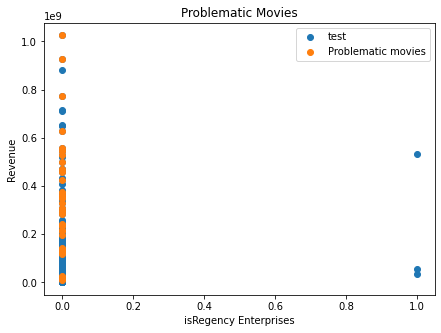

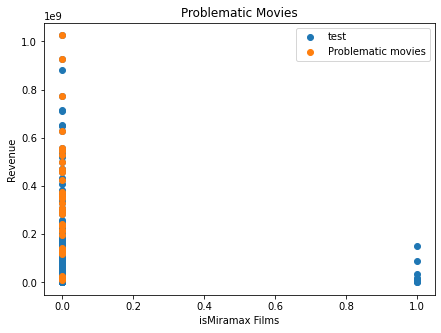

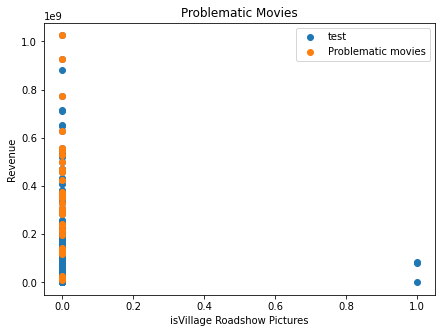

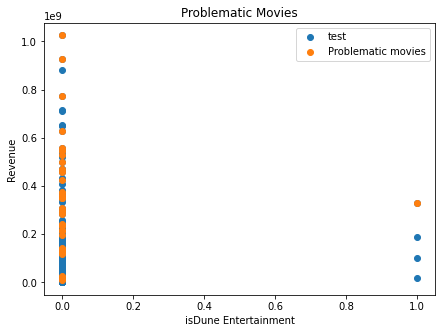

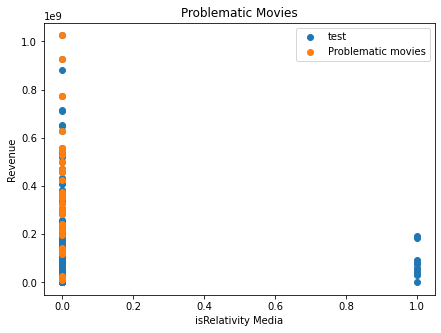

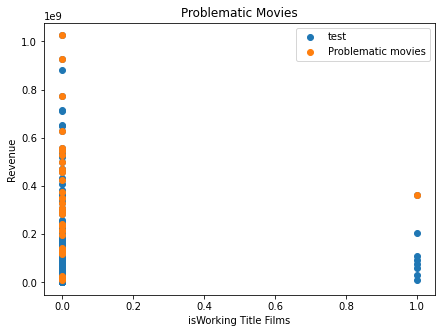

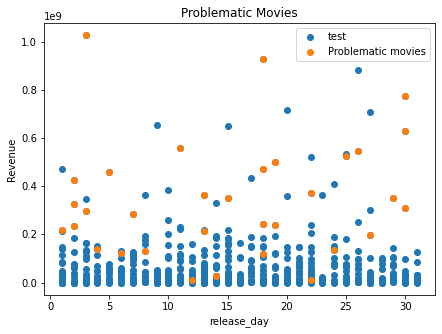

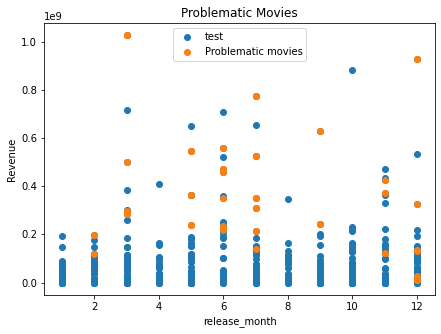

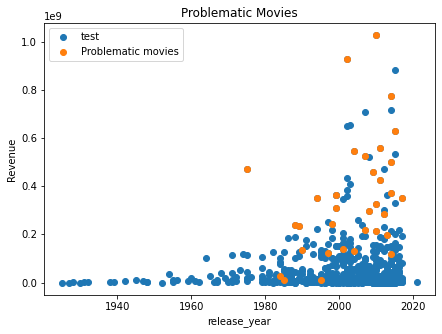

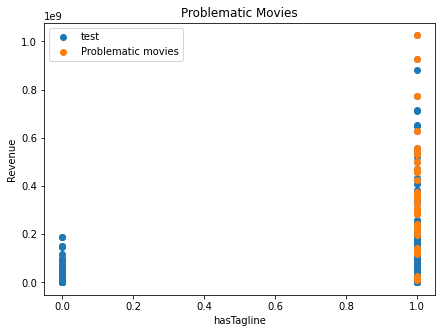

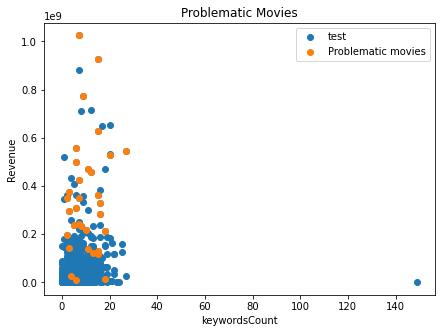

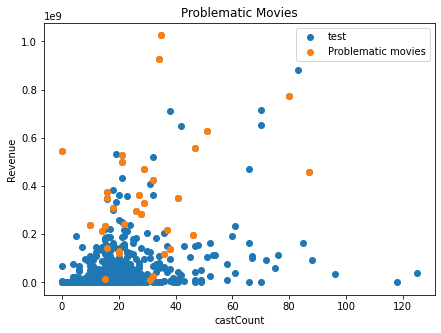

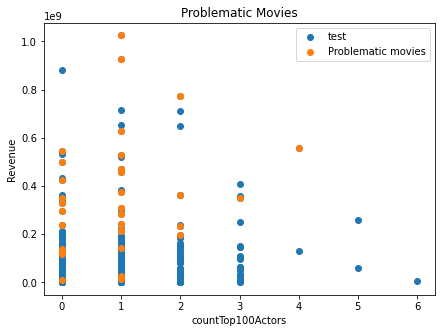

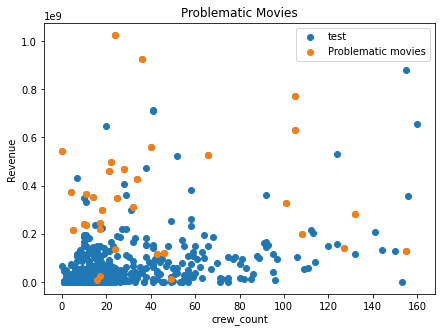

In [489]:
for i in range(36):
    problematic = (x_test[sel_errors_pos][:,i])
    test = x_test[:,i]
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(test, y_test, label='test')
    ax.scatter(problematic, y_test[sel_errors_pos], label="Problematic movies")
    ax.set_title("Problematic Movies")
    ax.set_xlabel(dataset.columns[i])
    ax.set_ylabel("Revenue")
    ax.legend()

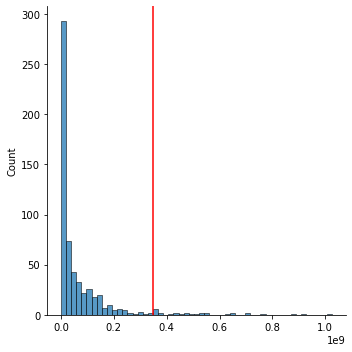

In [490]:
ax = sns.displot((y_test))
plt.axvline(np.mean((y_test[sel_errors_pos])), color='red')

In [495]:
#boosting
x = dataset_mat[:,:36]
y = dataset_mat[:,36]
x_train_80, x_test, y_train_80, y_test = train_test_split(x, y, test_size=0.20, random_state=42)
rf = RandomForestRegressor(n_estimators=int(best_k))
adaboost = AdaBoostRegressor(rf)
adaboost.fit(x_train_80,y_train_80)
adaboost.score(x_test,y_test)

0.6626289406753303

(array([ 0.71254115,  0.        ,  2.49389401,  4.98778802,  8.55049375,
        10.68811718, 16.03217577, 15.31963463,  9.26303489,  3.20643515]),
 array([0.59822456, 0.61225883, 0.62629311, 0.64032739, 0.65436166,
        0.66839594, 0.68243022, 0.6964645 , 0.71049877, 0.72453305,
        0.73856733]),
 <BarContainer object of 10 artists>)

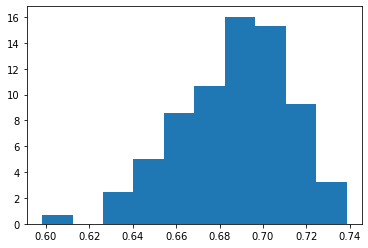

In [492]:
hist_data = []
for i in range (0,200):
    rf = RandomForestRegressor(n_estimators=int(best_k))
    adaboost = AdaBoostRegressor(rf)
    adaboost.fit(x_train_80,y_train_80)
    hist_data.append(adaboost.score(x_test,y_test))
plt.hist(hist_data, density = True)